In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

# load the data

In [2]:
os.listdir()

['reference_yara_axenic.xlsx',
 'model_store_compare_RMSE_model.ipynb',
 '10CC_reference_to_model_test_train.ipynb',
 '.ipynb_checkpoints',
 'reference_10cc_axenic.xlsx',
 'reference_10cc_all.xlsx',
 '10CC_reference_to_model.ipynb',
 'reference_final.xlsx',
 'monte_predicted_classes.csv.gz',
 'reference_pro99_axenic.xlsx',
 '10cc_FL_to_cell_numbers.ipynb',
 '10CC_reference_to_model_per_strain_shuffle.ipynb',
 'reference_ccpa.xlsx',
 'reference_10cc.xlsx',
 'data',
 '10CC_reference_to_model_per_strain_full.ipynb']

In [3]:
refdf_10cc = pd.read_excel('reference_10cc_all.xlsx')
refdf_ccpa = pd.read_excel('reference_ccpa.xlsx')
refdf_yara = pd.read_excel('reference_yara_axenic.xlsx')


In [4]:
#refdf_yara = refdf_yara.loc[~refdf_yara.strain.isin(['ctrl'])].copy()

In [5]:
refdf_yara.Group.value_counts()

Axenic_Other    15363
Axenic            681
Name: Group, dtype: int64

In [6]:
refdf_10cc['Experiment'] = '10CC'
refdf_ccpa['Experiment'] = '5x5'
refdf_yara['Experiment'] = 'Axenic_media'


In [7]:
refdf_ccpa[['Group', 'id','full name',  ]].value_counts()
#[~refdf_ccpa['train_Group'].isin(['Other'])]

Group         id              full name             
Strong_Other  MIT0604_DE1     A. mediterranea AltDE1    1338
Strong        MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  Natl2A_BS11     A. macleodii BS11         1338
              Natl2A_ATCC     A. macleodii ATCC27126    1338
              Natl2A_1A3      A. macleodii HOT1A3       1338
              MIT9313_DE1     A. mediterranea AltDE1    1338
              MIT9312_DE      A. mediterranea AltDE     1338
              MIT9312_1A3     A. macleodii HOT1A3       1338
              MIT0604_DE      A. mediterranea AltDE     1338
              MIT0604_1A3     A. macleodii HOT1A3       1338
              Natl2A_DE1      A. mediterranea AltDE1    1338
Strong        MED4_DE         A. mediterranea AltDE     1338
Other         all_all         Axenic                    1338
Strong_Other  MIT9313_DE      A. mediterranea AltDE     1284
              MIT9313_BS11    A. macleodii BS11         1284
              MIT9312_DE1     A.

In [8]:
refdf_ccpa.groupby('transfer').day.max()

transfer
0    140.708333
2     39.870000
3    140.930000
4    140.900000
5    120.900000
6    122.760000
7    122.750000
Name: day, dtype: float64

In [9]:
refdf_10cc.groupby('transfer').day.max()

transfer
0    128.767361
1     59.980556
2    119.040972
3    100.952083
4     79.987500
5     64.945139
Name: day, dtype: float64

In [10]:
refdf_ccpa.groupby('Sample').day.max().value_counts()

140.708333    91
39.870000     78
140.900000    77
122.750000    76
140.930000    74
122.760000    70
120.900000    69
Name: day, dtype: int64

In [11]:
refdf_yara.groupby('Sample').day.max().value_counts()

89.879861     76
90.987500     76
93.918056     64
90.951389     48
114.788194    16
Name: day, dtype: int64

In [12]:
refdf_10cc.groupby('Sample').day.max().value_counts()

128.767361    30
119.040972    30
100.952083    30
79.987500     30
64.945139     30
59.980556     18
Name: day, dtype: int64

In [13]:
refdf_10cc.loc[refdf_10cc.transfer.isin([0])].day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [14]:
refdf = pd.concat([refdf_10cc, refdf_ccpa, refdf_yara], ignore_index=True)

In [15]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.117251,0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),131321.579908
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,-0.005,-0.117251,-0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),-131321.579908
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.010,0.234503,1.553581,Axenic_media,NaN,NaN,ctrl,lowP(1:50),262643.159815
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.038,0.891111,5.903609,Axenic_media,NaN,NaN,ctrl,lowP(1:50),998044.007298


In [16]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Strong_Other', 'Axenic_Other', 'Other'], dtype=object)

In [17]:
refdf = refdf.loc[~(refdf.Group.isin(['Strong_Other']) & refdf.transfer.isin([0]))].copy()

In [18]:
refdf['train_Group'] = refdf['Group']
refdf.loc[~refdf.transfer.isin([0]), 'train_Group'] = 'Other'
#refdf.loc[~refdf.PRO.isin(['MED4']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Axenic_Other', 'Strong_Other']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Inhibited']), 'train_Group'] = 'Inhibited'


In [19]:
# remove all Other samples of 5x5 - too close to the phenotypes we want to keep
refdf = refdf.loc[~(refdf.Experiment.isin(['5x5']) & refdf.train_Group.isin(['Other']))]

In [20]:

refdf.loc[refdf.id.isin(['MED4_lowN']), 'train_Group']  = 'Axenic'


In [21]:
refdf.train_Group.value_counts()

Other        18687
Strong        1764
Inhibited     1386
Axenic        1167
Weak           666
Sustained      444
Name: train_Group, dtype: int64

In [22]:
refdf.groupby(['train_Group', 'Group', 'id','full name',  ]).size().head(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  Group         id                  full name                  
Axenic       Axenic        1                   Axenic                         222
                           MED4_Ax_Pro         Axenic                         264
                           MED4_lowN           Axenic_MED4_lowN               681
Inhibited    Inhibited     3                   Marinobacter adhaerens HP15    693
                           4                   Phaeobacter gallaeciensis      693
Other        Axenic        1                   Axenic                         471
             Axenic_Other  1314_Pro99          Axenic_1314_Pro99              174
                           1314_lowN           Axenic_1314_lowN               174
                           1314_lowP(1:50)     Axenic_1314_lowP(1:50)         174
                           1314_lowP(1:8)      Axenic_1314_lowP(1:8)          174
                           1327_Pro99          Axenic_1327_Pro99              180
                       

In [23]:
refdf.groupby(['train_Group', 'Group', 'id','full name',  ]).size().tail(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  Group         id                  full name                     
Other        Axenic_Other  MED4_Pro99          Axenic_MED4_Pro99                 681
                           MED4_lowP(1:50)     Axenic_MED4_lowP(1:50)            681
                           MED4_lowP(1:8)      Axenic_MED4_lowP(1:8)             681
                           MIT0604_Pro99       Axenic_MIT0604_Pro99              180
                           MIT0604_lowN        Axenic_MIT0604_lowN               180
                           MIT0604_lowP(1:50)  Axenic_MIT0604_lowP(1:50)         180
                           MIT0604_lowP(1:8)   Axenic_MIT0604_lowP(1:8)          180
                           MIT0609_Pro99       Axenic_MIT0609_Pro99              177
                           MIT0609_lowN        Axenic_MIT0609_lowN               177
                           MIT0609_lowP(1:50)  Axenic_MIT0609_lowP(1:50)         177
                           MIT0609_lowP(1:8)   Axenic_MIT0609_lowP(1:8) 

In [24]:
refdf.Sample.nunique()

466

In [25]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Axenic_Other'], dtype=object)

In [26]:
refdf_10cc.Sample.nunique(), refdf_yara.Sample.nunique(), refdf_ccpa.Sample.nunique()


(168, 280, 535)

In [27]:
groupby_cols = [ 'Sample', 'id',  'full name',  'Group',]
refdf[groupby_cols].value_counts().groupby('Group').size()

Group
Axenic           33
Axenic_Other    268
Inhibited        36
Strong           51
Sustained        33
Weak             45
dtype: int64

In [28]:
groupby_cols = [ 'Sample', 'id',  'full name',  'train_Group',]
refdf[groupby_cols].value_counts().groupby('train_Group').size()

train_Group
Axenic        18
Inhibited     36
Other        376
Strong        21
Sustained      6
Weak           9
dtype: int64

In [29]:
refdf['full name'].unique()

array(['Marinovum 5F3', 'Roseovarius 5C3', 'Axenic', 'A. macleodii 1A3',
       'Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis',
       'Pseudoalteromonas haloplanktis', 'Ruegeria pomeroyi',
       'Sulfitobacter pseudonitzschiae', 'E. coli', 'A. macleodii HOT1A3',
       'A. mediterranea AltDE', 'A. mediterranea AltDE1',
       'A. macleodii BS11', 'A. macleodii ATCC27126', 'Axenic_MED4_Pro99',
       'Axenic_MED4_lowN', 'Axenic_MED4_lowP(1:8)',
       'Axenic_MED4_lowP(1:50)', 'Axenic_9312_Pro99', 'Axenic_9312_lowN',
       'Axenic_9312_lowP(1:8)', 'Axenic_9312_lowP(1:50)',
       'Axenic_9313_Pro99', 'Axenic_9313_lowN', 'Axenic_9313_lowP(1:8)',
       'Axenic_9313_lowP(1:50)', 'Axenic_1327_Pro99', 'Axenic_1327_lowN',
       'Axenic_1327_lowP(1:8)', 'Axenic_1327_lowP(1:50)',
       'Axenic_MIT0604_Pro99', 'Axenic_MIT0604_lowN',
       'Axenic_MIT0604_lowP(1:8)', 'Axenic_MIT0604_lowP(1:50)',
       'Axenic_NATL2A_Pro99', 'Axenic_NATL2A_lowN',
       'Axenic_NATL2A_lowP(1:8)

In [30]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [31]:
refdf.describe()

,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C],predicted
count,8070.000000,6486.000000,2.411400e+04,24114.000000,24114.000000,24114.000000,24114.000000,1.604400e+04
mean,1.487732,39.734770,3.368495e+06,38.987208,0.592042,13.883541,91.978460,1.885563e+07
std,1.670766,38.448158,2.461607e+06,28.490819,1.196293,28.053409,185.853834,3.485655e+07
min,0.000000,0.000000,0.000000e+00,0.000000,-0.057000,-1.336666,-8.855413,-1.497066e+06
25%,0.000000,0.000000,1.378260e+06,15.952083,0.029000,0.680058,4.505385,9.980440e+05
50%,1.000000,41.843750,2.970420e+06,34.379861,0.087000,2.040175,13.516156,2.784017e+06
75%,3.000000,59.923611,4.995660e+06,57.820139,0.469000,10.998182,72.862958,1.733445e+07
max,5.000000,128.984028,1.215720e+07,140.708333,10.541000,247.189424,1637.629933,2.499050e+08


In [32]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [33]:
refdf_10cc[['Group', 'id', 'full name']].value_counts()

Group      id  full name                     
Axenic     1   Axenic                            693
Inhibited  3   Marinobacter adhaerens HP15       693
           4   Phaeobacter gallaeciensis         693
Strong     2   A. macleodii 1A3                  693
           5   Pseudoalteromonas haloplanktis    693
Sustained  6   Ruegeria pomeroyi                 693
           7   Sulfitobacter pseudonitzschiae    582
Weak       9   E. coli                           582
           10  Marinovum 5F3                     582
           11  Roseovarius 5C3                   582
dtype: int64

In [34]:
# smaller initial number of heterotroph cells
#problematic_ids_not_enough_hets = [2,4,9]
# decided to add back inhibited sample
problematic_ids_not_enough_hets = [2,9]
refdf.loc[refdf.id.isin(problematic_ids_not_enough_hets)][['Group', 'id', 'full name']].value_counts()


Group   id  full name       
Strong  2   A. macleodii 1A3    693
Weak    9   E. coli             582
dtype: int64

In [35]:
refdf = refdf.loc[~refdf.id.isin(problematic_ids_not_enough_hets)].copy()


# interpolation to make all groups have the same timepoints

In [36]:
# only use the first 90 days because that's what we have from Yara
timepoints_10cc_transfer0 = refdf_10cc.loc[
    refdf_10cc.transfer.isin([0]), # & refdf_10cc.day.le(91), 
    'day'].unique()
timepoints_10cc_transfer0

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [37]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [38]:
def interpolate_series(x):
    x1 = x[['day', 'ref_Bp[N]', 'ref_Bp[C]']].copy()
    x1.set_index('day', inplace=True)
    x1 = x1.reindex(x1.index.union(timepoints_10cc_transfer0))
    x1 = x1.interpolate(method='index',limit_direction='both')
    x1 = x1.reindex(timepoints_10cc_transfer0)    
    #x1.reset_index(inplace=True)
    return x1

In [39]:
refdf.isna().sum()

Sample              0
id                  0
replicate       17628
transfer        16044
transfer day    17628
heterotroph     17628
full name           0
Group               0
t                   0
day                 0
FL                  0
ref_Bp[N]           0
ref_Bp[C]           0
Experiment          0
PRO             21255
ALT             21255
strain           6795
media            6795
predicted        6795
train_Group         0
dtype: int64

In [40]:
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group',
       'Experiment', ]
refdf_interpolate = refdf.groupby(groupby_cols).apply(interpolate_series)
refdf_interpolate.reset_index(inplace=True)

In [41]:
refdf_interpolate

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C]
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584
...,...,...,...,...,...,...,...,...,...
32037,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,110.943750,0.117251,0.776791
32038,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,115.845833,0.445555,2.951804
32039,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,118.788889,0.891111,5.903609
32040,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,121.777778,1.055263,6.991115


In [42]:
refdf_interpolate.day.nunique()

74

In [43]:
refdf_interpolate.isna().sum()

train_Group    0
Sample         0
id             0
full name      0
Group          0
Experiment     0
day            0
ref_Bp[N]      0
ref_Bp[C]      0
dtype: int64

In [44]:
# only use the first 90 days because that's what we have from Yara
X = refdf_interpolate.loc[refdf_interpolate.day.le(91)].pivot_table(index=groupby_cols, values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')

In [45]:
X

ref_Bp[C]  \
day                                                                 0.000000    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        18.953691   
            1B0      1           Axenic          Axenic 10CC        10.098278   
            1C0      1           Axenic          Axenic 10CC        28.119820   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         22.837644   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         22.060853   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        10.875068   
            10C0     10          Marinovum 5F3   Weak   10CC        16.778677   
            11A0     11          Roseovarius 5C3 Weak   10CC        12.428650   
            11B0     11          Roseovarius 5C3 Weak   10CC        13.050082   
            11C0     11          Roseovarius 5C3 Weak   10CC         8.700055   

                                                                               \
day                                                                 1.081944    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         5.282176   
            1B0      1           Axenic          Axenic 10CC         9.632203   
            1C0      1           Axenic          Axenic 10CC         9.942920   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         32.233510   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         30.917603   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         4.350027   
            10C0     10          Marinovum 5F3   Weak   10CC        10.875068   
            11A0     11          Roseovarius 5C3 Weak   10CC        15.380454   
            11B0     11          Roseovarius 5C3 Weak   10CC         8.855413   
            11C0     11          Roseovarius 5C3 Weak   10CC         7.923264   

                                                                               \
day                                                                 2.164583    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        24.701941   
            1B0      1           Axenic          Axenic 10CC        22.526927   
            1C0      1           Axenic          Axenic 10CC        24.080508   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         33.015983   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         37.790148   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        23.148360   
            10C0     10          Marinovum 5F3   Weak   10CC        21.128704   
            11A0     11          Roseovarius 5C3 Weak   10CC        24.701941   
            11B0     11          Roseovarius 5C3 Weak   10CC        21.128704   
            11C0     11          Roseovarius 5C3 Weak   10CC        16.623319   

                                                                               \
day                                                                 2.747222    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        35.266293   
            1B0      1           Axenic          Axenic 10CC        35.421651   
            1C0      1           Axenic          Axenic 10CC        34.489502   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         47.609877   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         43.187889   
...            

In [46]:
X_logged = np.log10(X.clip(lower=1))

In [47]:
y = X.index.get_level_values(0)
y

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=433)

# Write refdf final file for the final reference samples

In [48]:
refdf_interpolate['t'] = refdf_interpolate['day'] * 3600 * 24

In [49]:
refdf_interpolate.head()

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C],t
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691,0.0
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176,93480.0
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941,187020.0
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293,237360.0
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584,324360.0


In [50]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [51]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained'])
                     ][['train_Group', 'full name', 'id']].value_counts() /(3*74)

train_Group  full name                       id         
Inhibited    Marinobacter adhaerens HP15     3              6.0
             Phaeobacter gallaeciensis       4              6.0
Axenic       Axenic_MED4_lowN                MED4_lowN      4.0
             Axenic                          1              1.0
                                             MED4_Ax_Pro    1.0
Strong       A. macleodii ATCC27126          MED4_ATCC      1.0
             A. macleodii BS11               MED4_BS11      1.0
             A. macleodii HOT1A3             MED4_1A3       1.0
             A. mediterranea AltDE           MED4_DE        1.0
             A. mediterranea AltDE1          MED4_DE1       1.0
             Pseudoalteromonas haloplanktis  5              1.0
Sustained    Ruegeria pomeroyi               6              1.0
             Sulfitobacter pseudonitzschiae  7              1.0
Weak         Marinovum 5F3                   10             1.0
             Roseovarius 5C3                 11

In [52]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Axenic'])
                     ][ 'id'].unique() 

array([1, 'MED4_Ax_Pro', 'MED4_lowN'], dtype=object)

In [53]:
refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    refdf_interpolate['full name'].isin(['Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis', ]) 
    
                     ]['Sample'].unique()

array(['3A0', '3A1', '3A2', '3A3', '3A4', '3A5', '3B0', '3B1', '3B2',
       '3B3', '3B4', '3B5', '3C0', '3C1', '3C2', '3C3', '3C4', '3C5',
       '4A0', '4A1', '4A2', '4A3', '4A4', '4A5', '4B0', '4B1', '4B2',
       '4B3', '4B4', '4B5', '4C0', '4C1', '4C2', '4C3', '4C4', '4C5'],
      dtype=object)

In [54]:
# remove non-transfer 0 samples (inhibited)
samples_to_ignore = [
    '3A1', '3A2', '3A3', '3A4', '3A5', 
    '3B1', '3B2', '3B3', '3B4', '3B5', 
    '3C1', '3C2', '3C3', '3C4', '3C5',
    '4A1', '4A2', '4A3', '4A4', '4A5', 
    '4B1', '4B2', '4B3', '4B4', '4B5',
    '4C1', '4C2', '4C3', '4C4', '4C5',
]

refdf_final_df = refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    ~refdf_interpolate['id'].isin(['MED4_Ax_Pro', 'MED4_lowN']) &
    ~refdf_interpolate['Sample'].isin(samples_to_ignore)    
                     ]
refdf_final_df[['Group', 'full name']].value_counts() / (3*74)

Group      full name                     
Axenic     Axenic                            1.0
Inhibited  Marinobacter adhaerens HP15       1.0
           Phaeobacter gallaeciensis         1.0
Strong     A. macleodii ATCC27126            1.0
           A. macleodii BS11                 1.0
           A. macleodii HOT1A3               1.0
           A. mediterranea AltDE             1.0
           A. mediterranea AltDE1            1.0
           Pseudoalteromonas haloplanktis    1.0
Sustained  Ruegeria pomeroyi                 1.0
           Sulfitobacter pseudonitzschiae    1.0
Weak       Marinovum 5F3                     1.0
           Roseovarius 5C3                   1.0
dtype: float64

# PCA to see the groups

In [55]:
greys = sns.color_palette('Greys')
sns.color_palette('Greys', n_colors=5)
grey_palette = sns.color_palette('Greys',n_colors=5)
grey_palette[1:4]

[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

In [56]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [57]:
grey_palette = sns.color_palette('Greys',n_colors=5, )
tgpalette = grey_palette[1:4] + ['black'] + sns.color_palette('dark', n_colors=4) 
tgorder = [ 'Other',  'Strong_Other', 'Axenic_Other', 
           'Axenic','Weak', 'Sustained','Inhibited', 'Strong',]

In [58]:
eorder = ['10CC', '5x5', 'Axenic_media']
epalette = [tgpalette[-4], tgpalette[-1], 'black']


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [60]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [61]:
pcadf

,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
0,Axenic,1A0,1,Axenic,Axenic,10CC,-3.923424,-4.223276
1,Axenic,1B0,1,Axenic,Axenic,10CC,-4.698742,-4.090700
2,Axenic,1C0,1,Axenic,Axenic,10CC,-4.207831,-4.132552
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-0.809925,-6.471408
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.013078,-6.052857
...,...,...,...,...,...,...,...,...
428,Weak,10B0,10,Marinovum 5F3,Weak,10CC,-7.100743,0.967204
429,Weak,10C0,10,Marinovum 5F3,Weak,10CC,-2.824506,-1.128912
430,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,-4.581499,-0.888917
431,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,-4.892122,0.877715


Text(0.5, 1.0, 'growth curves before fixing imbalance')

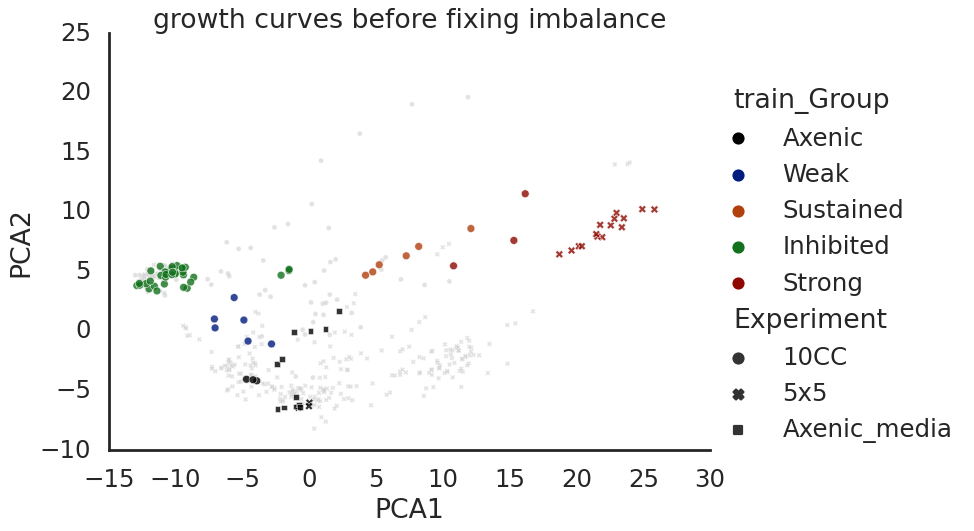

In [62]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.5, 
    zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

Text(0.5, 1.0, 'growth curves before fixing imbalance')

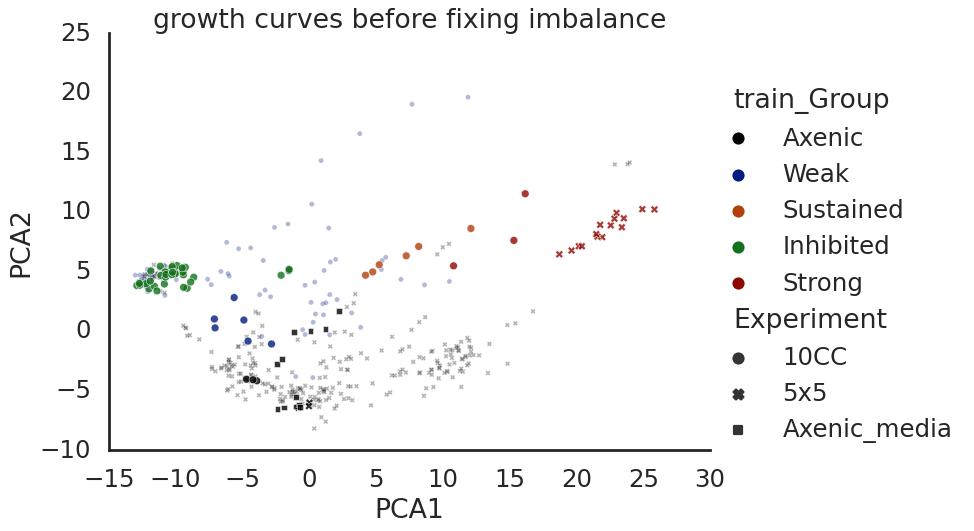

In [63]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [64]:
pcadf.train_Group.value_counts()


Other        349
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

# imbalance

In [65]:
X_ids = X_logged.index.get_level_values(2).astype(str)

In [66]:
from sklearn.model_selection import train_test_split
X_train_before_smt, X_test_before_smt, y_train_before_smt, y_test_before_smt = train_test_split(
    X_logged, y, test_size=0.5, stratify=y, random_state=43
)

X_train_before_smt = X_logged
y_train_before_smt = y
X_test_before_smt = X_logged
y_test_before_smt = y
X_train_before_smt.shape, y_train_before_smt.shape, X_test_before_smt.shape, y_test_before_smt.shape

((433, 126), (433,), (433, 126), (433,))

In [67]:
np.unique(y_train_before_smt, return_counts=True), np.unique(y_test_before_smt, return_counts=True)

((array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,  36, 349,  18,   6,   6])),
 (array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,  36, 349,  18,   6,   6])))

In [68]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')

train_Group       Sample         id         full name   Group  \
day                                                                 
0        Axenic          1A0          1            Axenic  Axenic   
16       Axenic  Ax_Media_D5  MED4_lowN  Axenic_MED4_lowN  Axenic   
15       Axenic  Ax_Media_D4  MED4_lowN  Axenic_MED4_lowN  Axenic   
14       Axenic  Ax_Media_C6  MED4_lowN  Axenic_MED4_lowN  Axenic   
13       Axenic  Ax_Media_C5  MED4_lowN  Axenic_MED4_lowN  Axenic   
..          ...          ...        ...               ...     ...   
427        Weak         10A0         10     Marinovum 5F3    Weak   
428        Weak         10B0         10     Marinovum 5F3    Weak   
429        Weak         10C0         10     Marinovum 5F3    Weak   
430        Weak         11A0         11   Roseovarius 5C3    Weak   
432        Weak         11C0         11   Roseovarius 5C3    Weak   

       Experiment ref_Bp[C]                                      \
day                     0.0 1.081944444442343 2.164583333331393   
0            10CC  1.277694          0.722813          1.392731   
16   Axenic_media  1.681292          1.709262          1.930650   
15   Axenic_media  1.602954          1.663299          1.878107   
14   Axenic_media  1.125832          0.869392          0.999997   
13   Axenic_media  1.266881          1.275312          1.033191   
..            ...       ...               ...               ...   
427          10CC  0.976664          1.135817          1.274119   
428          10CC  1.036432          0.638492          1.364520   
429          10CC  1.224758          1.036432          1.324873   
430          10CC  1.094424          1.186969          1.392731   
432          10CC  0.939522          0.898904          1.220718   

                       ...         ref_Bp[N]                    \
day 2.747222222220444  ... 73.76874999999563 76.93958333333285   
0            1.547360  ...          0.000000          0.000000   
16           2.079383  ...          0.000000          0.000000   
15           2.038827  ...          0.000000          0.000000   
14           0.915116  ...          0.000000          0.000000   
13           0.887098  ...          0.000000          0.000000   
..                ...  ...               ...               ...   
427          1.467796  ...          0.000000          0.000000   
428          1.558690  ...          0.000000          0.086151   
429          1.609635  ...          0.042246          0.000000   
430          1.575149  ...          0.000000          0.051389   
432          1.315186  ...          0.162540          0.086151   

                                                                     \
day 79.79513888888323 80.88888888888323 81.95833333332848  84.21875   
0            0.000000          0.000000          0.051389  0.000000   
16           0.000000          0.000000          0.000000  0.000000   
15           0.000000          0.000000          0.000000  0.000000   
14           0.000000          0.000000          0.000000  0.000000   
13           0.000000          0.000000          0.000000  0.000000   
..                ...               ...               ...       ...   
427          0.000000          0.000000          0.000000  0.000000   
428          0.000000          0.013601          0.013601  0.051389   
429          0.000000          0.169489          0.000000  0.133576   
430          0.094424          0.000000          0.233471  0.000000   
432          0.051389          0.094424          0.000000  0.051389   

                                                                   
day 86.8923611111095 87.7944444444438 88.74861111110658      91.0  
0           0.000000         0.000000          0.000000  0.000000  
16          0.000000         0.000000          0.000000  0.000000  
15          0.070235         0.010125          0.000000  0.000000  
14          0.218673         0.126760          0.002221  0.000000  
13          0.084991         0.048389      

In [69]:
 #sampling_strategy = {'Axenic' :100, 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],

In [70]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
#over_sampler =  RandomOverSampler()
smoteenn = SMOTEENN(
    smote=SMOTE(k_neighbors=5), 
    enn=EditedNearestNeighbours(sampling_strategy=['Other'], n_neighbors=50),
)
X_smt, y_smt = smoteenn.fit_resample(X_train_before_smt, y_train_before_smt)

In [71]:
y_train_before_smt.value_counts()

Other        349
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

In [72]:
np.unique(y_smt, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([349, 349,  82, 349, 349, 349]))

In [73]:
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [74]:
X_smt

ref_Bp[C]                                                              \
day  0.000000  1.081944  2.164583  2.747222  3.754167  4.701389  5.720139    
0     1.277694  0.722813  1.392731  1.547360  1.677055  1.915610  2.202481   
1     1.004247  0.983726  1.352702  1.549269  1.705882  1.930906  2.183003   
2     1.449013  0.997514  1.381666  1.537687  1.750043  1.995473  2.221934   
3     1.358651  1.508308  1.518724  1.677697  1.870343  1.996990  2.101492   
4     1.343622  1.490206  1.577379  1.635362  1.854084  1.998629  2.114067   
...        ...       ...       ...       ...       ...       ...       ...   
1822  1.074661  0.935975  1.300650  1.441007  1.396490  1.678350  1.756221   
1823  0.960375  1.031916  1.250700  1.400867  1.513946  1.637986  1.525461   
1824  1.062947  0.889263  1.377419  1.566215  1.625451  1.667874  1.636481   
1825  1.141249  1.069885  1.307789  1.561892  1.701789  1.904660  1.934303   
1826  1.004033  0.916600  1.258875  1.375249  1.379781  1.651773  1.652008   

                                    ... ref_Bp[N]                      \
day  6.731944  7.984028  8.943750   ... 73.768750 76.939583 79.795139   
0     2.366749  2.622537  2.574251  ...  0.000000  0.000000  0.000000   
1     2.397440  2.653732  2.596339  ...  0.000000  0.000000  0.000000   
2     2.424245  2.675206  2.529591  ...  0.000000  0.086151  0.000000   
3     2.189908  2.351754  2.444636  ...  0.112203  0.000000  0.000000   
4     2.210278  2.389620  2.489753  ...  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
1822  1.799251  1.293078  1.481730  ...  0.037801  0.022811  0.114462   
1823  1.372566  0.536819  1.225412  ...  0.071283  0.037783  0.022537   
1824  1.612762  1.297517  1.511686  ...  0.000000  0.070258  0.043172   
1825  1.963395  1.420498  1.546880  ...  0.028026  0.000000  0.000000   
1826  1.579046  0.874598  1.329960  ...  0.102994  0.055915  0.081498   

                                                                            
day  80.888889 81.958333 84.218750 86.892361 87.794444 88.748611 91.000000  
0     0.000000  0.051389  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.003617  0.000000  0.141000  
2     0.003617  0.000000  0.000000  0.000000  0.094424  0.003617  0.000000  
3     0.041134  0.015920  0.000000  0.000000  0.000000  0.000000  0.004780  
4     0.000000  0.105624  0.333784  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
1822  0.152031  0.000000  0.208905  0.027521  0.067264  0.150589  0.013601  
1823  0.041411  0.000000  0.022537  0.051897  0.126843  0.000000  0.005965  
1824  0.007382  0.114128  0.027893  0.023496  0.129831  0.124928  0.032754  
1825  0.112438  0.000000  0.088614  0.000000  0.002399  0.000000  0.000000  
1826  0.121924  0.000000  0.126582  0.074984  0.183269  0.071886  0.013601  

[1827 rows x 126 columns]

In [75]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [76]:
pcadf.loc[pcadf.train_Group.isin(['Axenic'])].nlargest(n=10,columns='PCA1')


,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
8,Axenic,Ax_Media_A6,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,2.227864,1.615385
12,Axenic,Ax_Media_C4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,1.228202,0.147606
7,Axenic,Ax_Media_A5,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,0.078978,-0.031860
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.013078,-6.052857
5,Axenic,5x5_30C0,MED4_Ax_Pro,Axenic,Axenic,5x5,-0.027608,-6.349298
11,Axenic,Ax_Media_B6,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-0.713215,-6.429782
10,Axenic,Ax_Media_B5,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-0.782632,-6.212475
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-0.809925,-6.471408
9,Axenic,Ax_Media_B4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-0.993959,-6.371134
15,Axenic,Ax_Media_D4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-1.000878,-5.593531


In [77]:
pcadf.loc[pcadf.train_Group.isin(['Inhibited'])].nlargest(n=10,columns='PCA1')


,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
30,Inhibited,3C0,3,Marinobacter adhaerens HP15,Inhibited,10CC,-1.506511,5.132330
24,Inhibited,3B0,3,Marinobacter adhaerens HP15,Inhibited,10CC,-1.520585,5.029856
18,Inhibited,3A0,3,Marinobacter adhaerens HP15,Inhibited,10CC,-2.109274,4.640191
32,Inhibited,3C2,3,Marinobacter adhaerens HP15,Inhibited,10CC,-8.646083,4.470744
42,Inhibited,4B0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-8.874292,4.071068
36,Inhibited,4A0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-9.136615,3.547024
34,Inhibited,3C4,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.277384,5.311222
48,Inhibited,4C0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-9.407011,3.621844
25,Inhibited,3B1,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.413681,4.670174
31,Inhibited,3C1,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.448910,4.889521


Text(0.5, 1.0, 'growth curves before fixing imbalance')

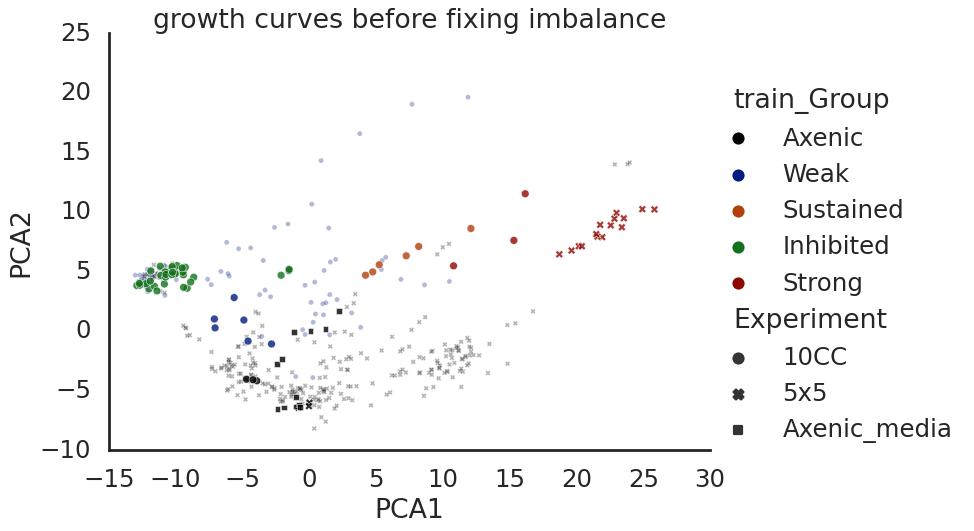

In [78]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [79]:
Xpca = pca.fit_transform(X_smt)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'])
pcadf['train_Group'] = y_smt


Text(0.5, 1.0, 'growth curves after fixing imbalance')

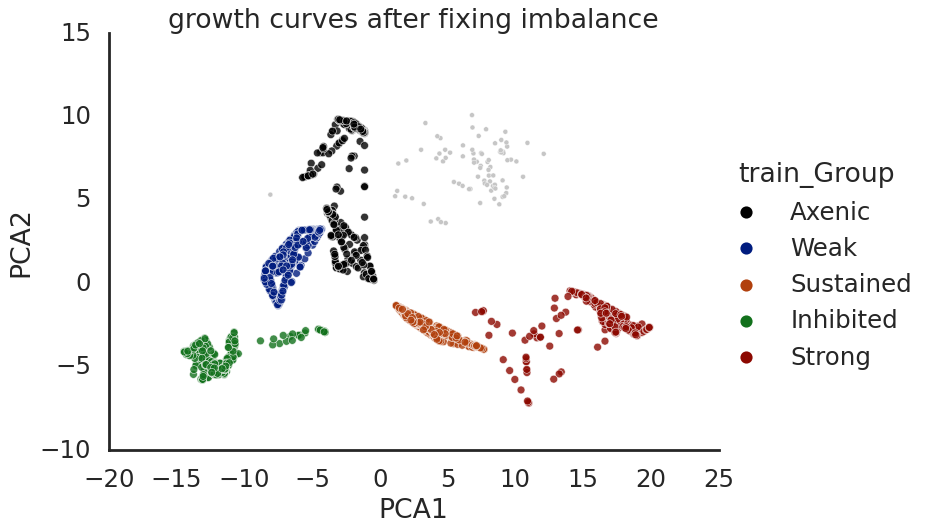

In [80]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  
    alpha=1, 
    #zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves after fixing imbalance')

# Compute features

In [81]:
def _compute_max_features(df, groupby_col, nutrient, biomass_prefix):
    bcol=f'{biomass_prefix}[{nutrient}]'
    refmaxbp_df = df.loc[df.groupby(groupby_col)[bcol].idxmax()].reset_index(drop=True)
    refmaxbp_df = refmaxbp_df.set_index(groupby_col)
    refmaxbp_df = refmaxbp_df[['day', bcol]]
    refmaxbp_df[bcol] = np.power(10, refmaxbp_df[bcol])
    refmaxbp_df.rename(columns={
        'day' : f'max_{nutrient}day', 
        bcol  : f'max_{nutrient}biomass',
    }, inplace=True)
    return refmaxbp_df

def _compute_mean_features(df, groupby_col, nutrient, biomass_prefix):
    bcol=f'{biomass_prefix}[{nutrient}]'
    min_day = 30
    max_day = 60
    df['bcol2'] = np.power(10, df[bcol])
    lterm_df = df.loc[df.day.ge(min_day) & df.day.le(max_day)]
    
    reflterm_df = lterm_df.groupby(groupby_col)['bcol2'].agg(['mean', 'std', 'median'])
    reflterm_df.rename(columns={
        'mean' : f'mean_{nutrient}biomass',
        'median' : f'median_{nutrient}biomass',
        'std' : f'std_{nutrient}biomass',
    }, inplace=True)
    return reflterm_df

def _compute_lastday_features(df, groupby_col, nutrient, biomass_prefix):
    bcol=f'{biomass_prefix}[{nutrient}]'
    lod_lastday_threshold = np.log10(2)
    refmaxday_df = df.loc[df[bcol].ge(lod_lastday_threshold)].groupby(groupby_col).day.max()
    #refmaxday_df.rename(columns=dict(day=f'last_day{nutrient}'), inplace=True)
    refmaxday_df.name = f'last_day{nutrient}'
    return refmaxday_df

def _compute_features(df, groupby_col, biomass_prefix):
    #return (
    df_list = (
        [_compute_max_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_mean_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_lastday_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC']
    )
    df_merge = df_list[0].join(df_list[1:])
        
    df_merge.fillna(0, inplace=True) # for last day
    return df_merge
    

In [82]:
# log the biomass
def add_log_cols(df, biomass_prefix):
    lod_threshold = 1
    for nutrient in 'NC':
        df[f'log_{nutrient}biomass'] = np.log10(df[f'{biomass_prefix}[{nutrient}]'].clip(lower=lod_threshold))
    return df

In [83]:
def _X_smt_to_features(X_smt):
    x = X_smt.T.melt(ignore_index=False, var_name='smt_id',).reset_index()
    x = x.pivot(index=['smt_id', 'day'], values='value', columns='level_0').reset_index()
    return _compute_features(x, groupby_col='smt_id', biomass_prefix='ref_Bp')

X_smt_features = _X_smt_to_features(X_smt)

In [84]:
#x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
#x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']
X_smt1 = X_smt.copy()

X_smt1.columns = [f'{col}_{day:2.1f}' for col,day in X_smt1.columns.values]

logistic_Nfeatures = [c for c in X_smt1.columns if c.startswith('ref_Bp[N]')]
logistic_Cfeatures = [c for c in X_smt1.columns if c.startswith('ref_Bp[C]')]
forest_features = X_smt_features.columns
X_train = X_smt_features.join(X_smt1)


In [85]:
X_test_features = _X_smt_to_features(X_test_before_smt.reset_index(drop=True))
X_test_features.index = X_test_before_smt.index


In [86]:
#x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
#x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']
X_test1 = X_test_before_smt.copy()
X_test1.columns = [f'{col}_{day:2.1f}' for col,day in X_test1.columns.values]
X_test = X_test_features.join(X_test1)


In [87]:
y_smt

array(['Axenic', 'Axenic', 'Axenic', ..., 'Weak', 'Weak', 'Weak'],
      dtype=object)

In [88]:
pd.Series(y_smt).value_counts()

Axenic       349
Inhibited    349
Strong       349
Sustained    349
Weak         349
Other         82
dtype: int64

In [89]:
y_test = y_test_before_smt
y_train = y_smt

In [90]:
X_smt1.columns

Index(['ref_Bp[C]_0.0', 'ref_Bp[C]_1.1', 'ref_Bp[C]_2.2', 'ref_Bp[C]_2.7',
       'ref_Bp[C]_3.8', 'ref_Bp[C]_4.7', 'ref_Bp[C]_5.7', 'ref_Bp[C]_6.7',
       'ref_Bp[C]_8.0', 'ref_Bp[C]_8.9',
       ...
       'ref_Bp[N]_73.8', 'ref_Bp[N]_76.9', 'ref_Bp[N]_79.8', 'ref_Bp[N]_80.9',
       'ref_Bp[N]_82.0', 'ref_Bp[N]_84.2', 'ref_Bp[N]_86.9', 'ref_Bp[N]_87.8',
       'ref_Bp[N]_88.7', 'ref_Bp[N]_91.0'],
      dtype='object', length=126)

In [91]:
logistic_Cfeatures, logistic_Nfeatures, forest_features

(['ref_Bp[C]_0.0',
  'ref_Bp[C]_1.1',
  'ref_Bp[C]_2.2',
  'ref_Bp[C]_2.7',
  'ref_Bp[C]_3.8',
  'ref_Bp[C]_4.7',
  'ref_Bp[C]_5.7',
  'ref_Bp[C]_6.7',
  'ref_Bp[C]_8.0',
  'ref_Bp[C]_8.9',
  'ref_Bp[C]_9.7',
  'ref_Bp[C]_10.8',
  'ref_Bp[C]_11.7',
  'ref_Bp[C]_12.8',
  'ref_Bp[C]_13.7',
  'ref_Bp[C]_16.1',
  'ref_Bp[C]_16.7',
  'ref_Bp[C]_17.7',
  'ref_Bp[C]_18.7',
  'ref_Bp[C]_19.7',
  'ref_Bp[C]_20.8',
  'ref_Bp[C]_21.9',
  'ref_Bp[C]_23.9',
  'ref_Bp[C]_25.7',
  'ref_Bp[C]_26.7',
  'ref_Bp[C]_27.9',
  'ref_Bp[C]_29.8',
  'ref_Bp[C]_31.1',
  'ref_Bp[C]_31.8',
  'ref_Bp[C]_32.8',
  'ref_Bp[C]_33.7',
  'ref_Bp[C]_34.8',
  'ref_Bp[C]_36.9',
  'ref_Bp[C]_37.8',
  'ref_Bp[C]_39.9',
  'ref_Bp[C]_40.8',
  'ref_Bp[C]_41.8',
  'ref_Bp[C]_44.8',
  'ref_Bp[C]_46.8',
  'ref_Bp[C]_47.9',
  'ref_Bp[C]_48.8',
  'ref_Bp[C]_49.9',
  'ref_Bp[C]_51.8',
  'ref_Bp[C]_53.0',
  'ref_Bp[C]_54.8',
  'ref_Bp[C]_58.8',
  'ref_Bp[C]_59.9',
  'ref_Bp[C]_62.9',
  'ref_Bp[C]_65.7',
  'ref_Bp[C]_67.0',
  'ref_Bp[C

# Stacking classifier

The goal is to create multiple classifiers:
1. randomforest based on generated features: last day, max day, max value, mean late biomass (N & C), std late biomass (N & C)
2. logical regression based on N biomass
3. logical regression based on C biomass
4. tslearn based on N biomass 
5. tslearn based on C biomass 

and than combine the results using a stacking classifier

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier()
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)

#stack.fit(X_train, y_train)


# FOREST

In [93]:
class_weight = {i : 1 if i == 'Other' else 1000 for i in y.unique()}
class_weight

{'Axenic': 1000,
 'Inhibited': 1000,
 'Other': 1,
 'Strong': 1000,
 'Sustained': 1000,
 'Weak': 1000}

In [94]:
clf_features = RandomForestClassifier(class_weight=class_weight, # min_samples_leaf=25
                                     )
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [95]:
pipe_forest.fit(X_train,y_train)

Pipeline(memory='/tmp/Osnat/sklearn_cache',
         steps=[('select',
                 ColumnTransformer(transformers=[('sel', 'passthrough',
                                                  Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object'))])),
                ('scale', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight={'Axenic': 1000,
                                                      'Inhibited': 1000,
                                                      'Other': 1,
                                                      'Strong': 1000,
                                                      'Sustained': 1000,
                                                      'Weak': 1000}))])

<Axes: xlabel='Importance', ylabel='Feature'>

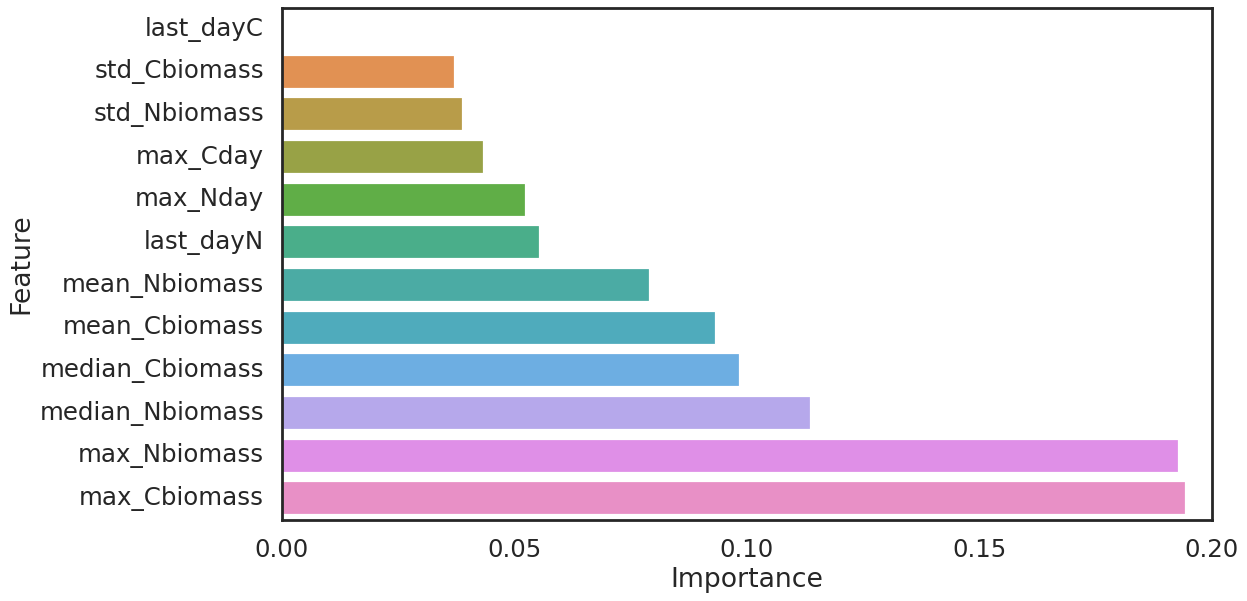

In [96]:
forest_importance_df = pd.DataFrame(dict(Feature=forest_features, Importance=pipe_forest.named_steps.clf.feature_importances_))
forest_importance_df =forest_importance_df.sort_values('Importance')
                                    
sns.barplot(data=forest_importance_df, y='Feature', x='Importance')


In [97]:
y_pred_prop = pipe_forest.predict_proba(X_test)
y_pred = pipe_forest.predict(X_test)

In [98]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')[['train_Group', 'id', 'full name']]

,train_Group,id,full name
day,,,
0,Axenic,1,Axenic
16,Axenic,MED4_lowN,Axenic_MED4_lowN
15,Axenic,MED4_lowN,Axenic_MED4_lowN
14,Axenic,MED4_lowN,Axenic_MED4_lowN
13,Axenic,MED4_lowN,Axenic_MED4_lowN
...,...,...,...
427,Weak,10,Marinovum 5F3
428,Weak,10,Marinovum 5F3
429,Weak,10,Marinovum 5F3


In [99]:
from sklearn.metrics import balanced_accuracy_score
print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

1.0 0.5196304849884527
0.9006685768863418
              precision    recall  f1-score   support

      Axenic       0.17      1.00      0.29        18
   Inhibited       0.39      1.00      0.56        36
       Other       1.00      0.40      0.58       349
      Strong       0.72      1.00      0.84        18
   Sustained       0.67      1.00      0.80         6
        Weak       0.11      1.00      0.19         6

    accuracy                           0.52       433
   macro avg       0.51      0.90      0.54       433
weighted avg       0.89      0.52      0.57       433



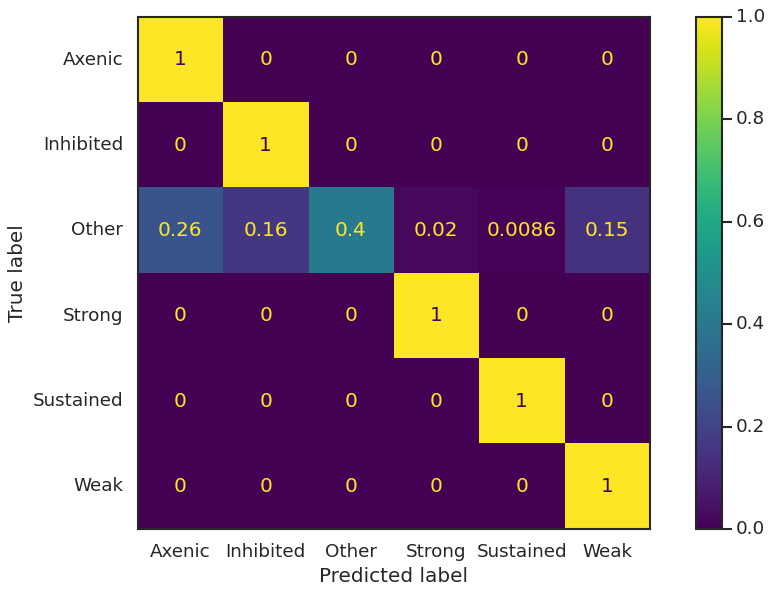

In [100]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

# stack

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y_train), le.classes_


(array([0, 0, 0, ..., 5, 5, 5]),
 array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object))

In [202]:
class_weight_map = {'Axenic' : 100, 'Inhibited' : 10000, 'Other': 1, 'Strong' : 10000, 'Sustained' : 10000, 'Weak': 100}

In [203]:
class_weight = {i : class_weight_map[c] for i,c in enumerate(le.classes_)}
class_weight

{0: 100, 1: 10000, 2: 1, 3: 10000, 4: 10000, 5: 100}

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier(ccp_alpha=0.05, class_weight=class_weight)
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, class_weight=class_weight,)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, class_weight=class_weight,)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)



In [205]:
stack.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
                                                                                  Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 10000,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

In [206]:
y_pred_prop = stack.predict_proba(X_test)
y_pred = stack.predict(X_test)

In [207]:
y_pred_prop

array([[9.89187844e-01, 2.04182374e-03, 4.94972743e-03, 1.00527393e-03,
        1.11026373e-03, 1.70506682e-03],
       [9.89081047e-01, 2.05984981e-03, 4.98886292e-03, 1.01429874e-03,
        1.12022427e-03, 1.73571735e-03],
       [9.89061245e-01, 2.06282707e-03, 4.99793707e-03, 1.01579704e-03,
        1.12181218e-03, 1.74038157e-03],
       ...,
       [1.66935255e-03, 2.15971464e-03, 3.03081232e-03, 8.97108548e-04,
        1.15484404e-03, 9.91088168e-01],
       [1.66239122e-03, 2.15930956e-03, 3.02575316e-03, 8.95979052e-04,
        1.15386248e-03, 9.91102705e-01],
       [1.68244117e-03, 2.21636948e-03, 3.06465648e-03, 9.07847717e-04,
        1.17024344e-03, 9.90958442e-01]])

In [208]:
from sklearn.metrics import balanced_accuracy_score
#print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8748806112702961
              precision    recall  f1-score   support

      Axenic       0.12      1.00      0.21        18
   Inhibited       0.30      1.00      0.46        36
       Other       1.00      0.25      0.40       349
      Strong       0.58      1.00      0.73        18
   Sustained       0.50      1.00      0.67         6
        Weak       0.18      1.00      0.31         6

    accuracy                           0.39       433
   macro avg       0.45      0.87      0.46       433
weighted avg       0.87      0.39      0.41       433



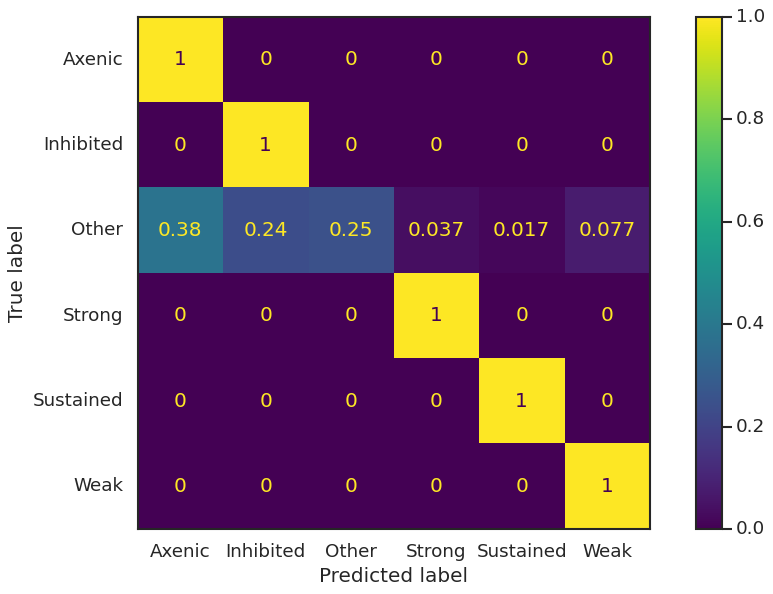

In [209]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

In [210]:
X_test

max_Nday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Nbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC           63.292311   
            1B0      1           Axenic          Axenic 10CC           68.005818   
            1C0      1           Axenic          Axenic 10CC           71.453010   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5           176.144498   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5           165.971655   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC            5.581167   
            10C0     10          Marinovum 5F3   Weak   10CC           27.804218   
            11A0     11          Roseovarius 5C3 Weak   10CC           22.895292   
            11B0     11          Roseovarius 5C3 Weak   10CC           12.756953   
            11C0     11          Roseovarius 5C3 Weak   10CC            6.401927   

                                                                     max_Cday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Cbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC          419.311563   
            1B0      1           Axenic          Axenic 10CC          450.538545   
            1C0      1           Axenic          Axenic 10CC          473.376189   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5          1166.957299   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5          1099.562214   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC           36.975232   
            10C0     10          Marinovum 5F3   Weak   10CC          184.202943   
            11A0     11     

In [211]:
df_predicted = pd.DataFrame(y_pred_prop, columns=stack.classes_)
df_predicted['y'] = y_test
df_predicted['y_pred'] = y_pred

df_predicted.index = X_test.index
df_predicted = df_predicted.reset_index()
df_predicted


,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.989188,0.002042,0.004950,0.001005,0.001110,0.001705,Axenic,Axenic
1,Axenic,1B0,1,Axenic,Axenic,10CC,0.989081,0.002060,0.004989,0.001014,0.001120,0.001736,Axenic,Axenic
2,Axenic,1C0,1,Axenic,Axenic,10CC,0.989061,0.002063,0.004998,0.001016,0.001122,0.001740,Axenic,Axenic
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.989305,0.002039,0.004859,0.001032,0.001084,0.001682,Axenic,Axenic
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.989289,0.002042,0.004868,0.001034,0.001085,0.001684,Axenic,Axenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Weak,10B0,10,Marinovum 5F3,Weak,10CC,0.001666,0.002176,0.003036,0.000899,0.001158,0.991065,Weak,Weak
429,Weak,10C0,10,Marinovum 5F3,Weak,10CC,0.001693,0.002113,0.003288,0.001129,0.001232,0.990545,Weak,Weak
430,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,0.001669,0.002160,0.003031,0.000897,0.001155,0.991088,Weak,Weak
431,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,0.001662,0.002159,0.003026,0.000896,0.001154,0.991103,Weak,Weak


In [212]:
df_predicted.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak', 'y',
       'y_pred'],
      dtype='object')

In [213]:
mdf_predicted = df_predicted.melt(
    id_vars=['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
        'y', 'y_pred'], 
    var_name='predicted', value_name='prob')
#mdf_predicted.predicted = pd.to_numeric(mdf_predicted.predicted)
mdf_predicted['predicted_correctly'] = (mdf_predicted['y'] == mdf_predicted['predicted']).map({
    True: 'correct prediction', False: 'false prediction'
})



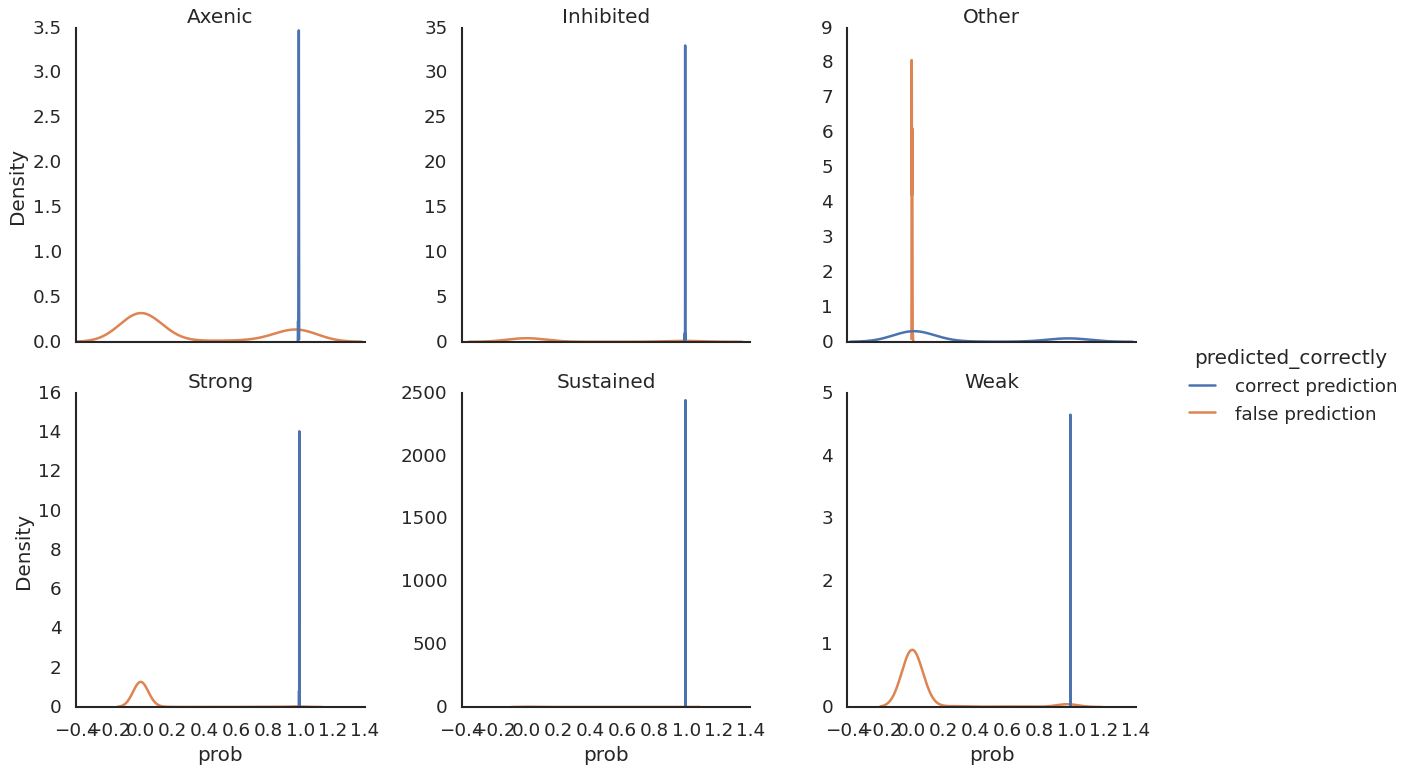

In [214]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted.isin([3])], 
            x='prob',
            kind='kde',
            col='predicted',
            hue='predicted_correctly',
            col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              facet_kws=dict(sharey=False),
           )
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

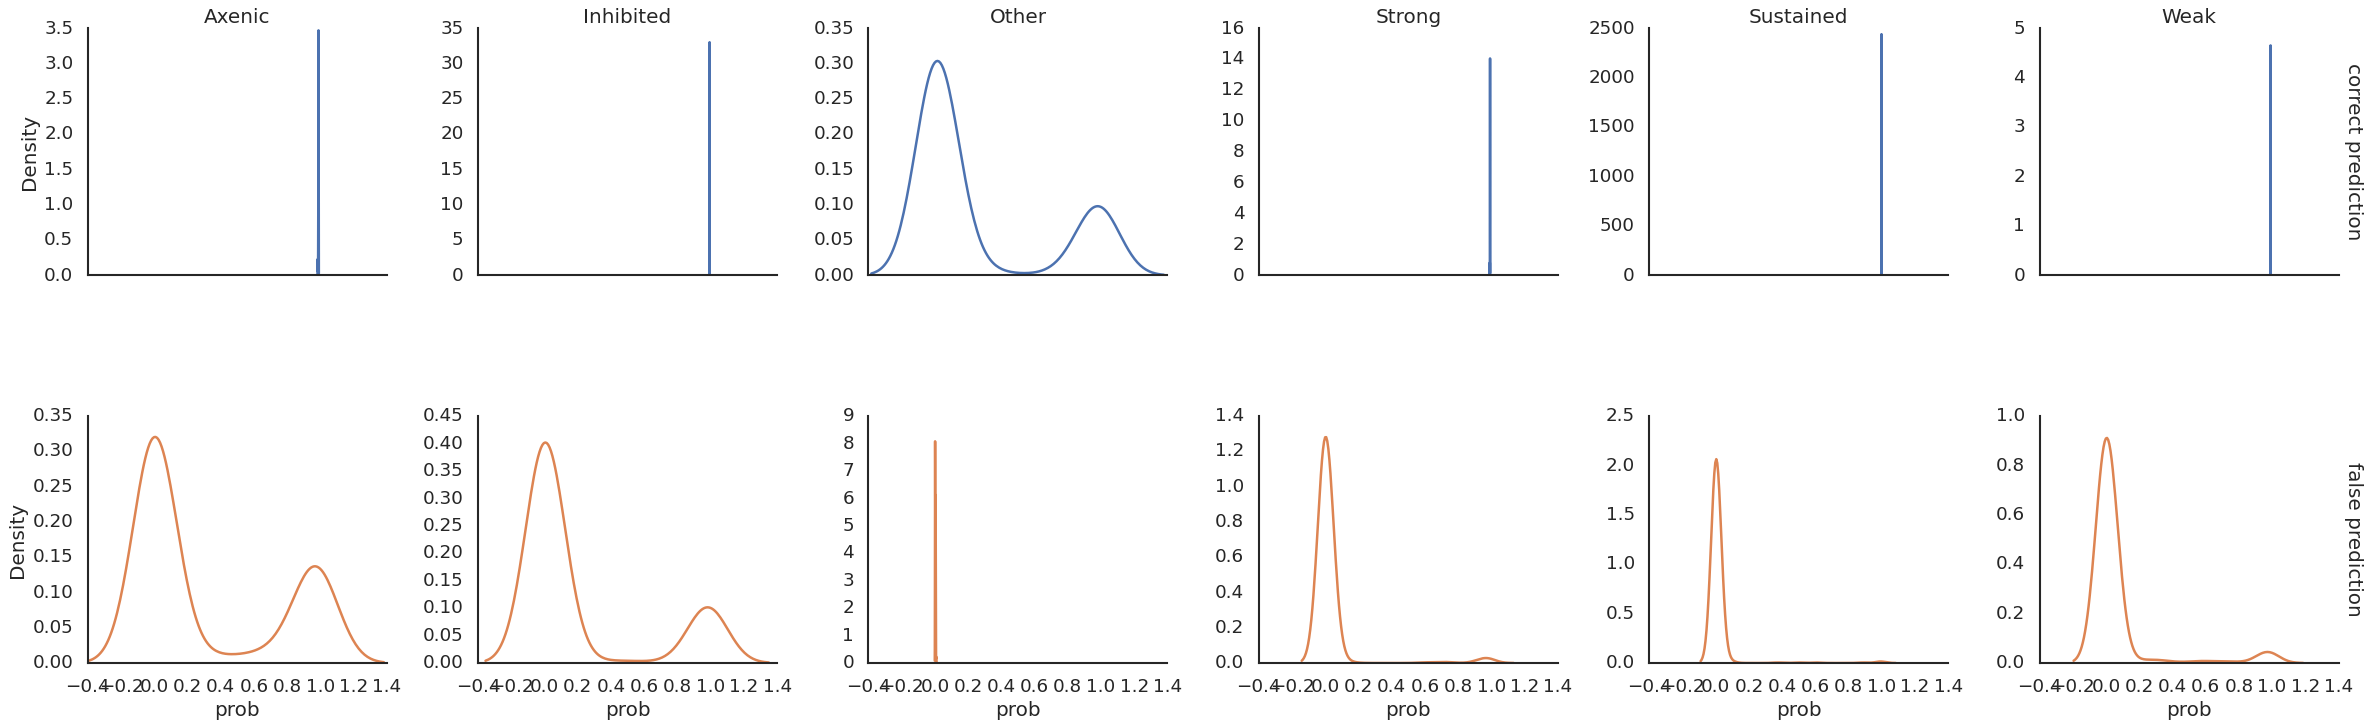

In [215]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted_correctly.isin([True])], 
            x='prob',
            kind='kde',
            col='predicted',
            row='predicted_correctly',
            hue='predicted_correctly',
            #col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              legend=False,
              facet_kws=dict(sharey=False, margin_titles=True),
           )
g.set_titles(col_template='{col_name}', row_template='{row_name}', )
#g.set(yscale='log')

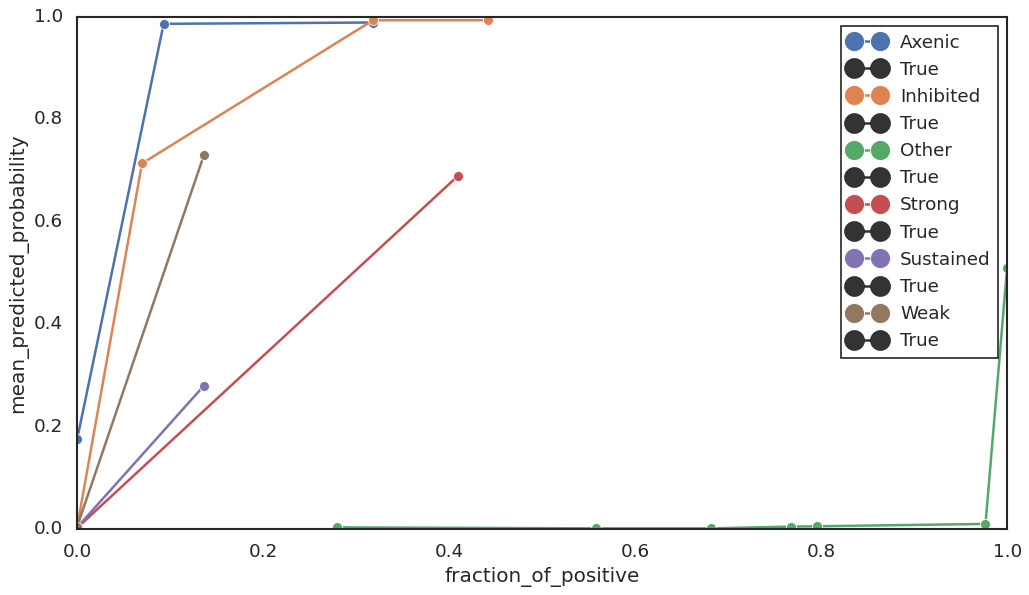

In [216]:
from sklearn.calibration import calibration_curve
for class_ in stack.classes_:
    sns.lineplot(
    #sns.scatterplot(
        data=pd.DataFrame(calibration_curve(
            y_test==class_, df_predicted[class_], 
            strategy='quantile', 
            n_bins=10,)).T,
        x=0, y=1, markers=True, style=True,
        label=class_
    )
plt.gca().set(xlabel='fraction_of_positive', ylabel='mean_predicted_probability')
plt.show()

# classify simulations

In [217]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte_het_clean_df.csv.gz',))

# sim_df = pd.concat([
#     sim_df1,
#     sim_df2,
#     sim_df3,
#     sim_df4,
#     sim_df5,
#     sim_df6,
#     sim_df7,
# ])

In [218]:
var_names = ['Bp',
 'Np',
 'Cp',
 'Bh',
 'Nh',
 'Ch',
 'DON',
 'RDON',
 'DIN',
 'DOC',
 'RDOC',
 'DIC',
 'ROS']

In [219]:
sim_df[var_names].min(axis=1)

0          0.000000e+00
1         -6.766083e-21
2         -6.069802e-21
3         -5.725232e-21
4          3.557252e-03
               ...     
3651821    7.291321e-04
3651822    7.293331e-04
3651823    7.294394e-04
3651824    7.295381e-04
3651825    7.297381e-04
Length: 3651826, dtype: float64

In [220]:
min_values = sim_df[var_names+['run_id']].groupby('run_id').min().min(axis=1)
bad_ids_negative_values = set(min_values[min_values< -1e-9].index)
len(bad_ids_negative_values)

0

In [221]:
min_values.describe()

count    4.934900e+04
mean    -2.319112e-13
std      8.758769e-12
min     -8.426275e-10
25%     -2.996153e-20
50%     -1.388593e-20
75%     -5.507279e-21
max      0.000000e+00
dtype: float64

In [222]:
sim_df = sim_df[['run_id', 'day', 'Bptotal[N]','Bptotal[C]']]

In [223]:
max_values = sim_df.groupby('run_id').max().max(axis=1)
bad_ids_toobig_values = set(max_values[max_values>1e5].index)
len(bad_ids_toobig_values)

0

In [224]:
sim_df = sim_df.loc[~sim_df.run_id.isin(bad_ids_negative_values | bad_ids_toobig_values)].copy()

In [225]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [226]:
sim_df

,run_id,day,ref_Bp[N],ref_Bp[C]
0,monte_MIXOTROPH_60_monte_vpro_57_20_MIXOTROPH_...,0.000000,0.892857,5.915179
1,monte_MIXOTROPH_60_monte_vpro_57_20_MIXOTROPH_...,1.081944,1.924773,11.179257
2,monte_MIXOTROPH_60_monte_vpro_57_20_MIXOTROPH_...,2.164583,3.543473,20.547904
3,monte_MIXOTROPH_60_monte_vpro_57_20_MIXOTROPH_...,2.747222,4.919190,28.524631
4,monte_MIXOTROPH_60_monte_vpro_57_20_MIXOTROPH_...,3.754167,8.677852,50.331356
...,...,...,...,...
3651821,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,110.943750,1.456150,13.801041
3651822,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,115.845833,1.467371,13.907859
3651823,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,118.788889,1.473658,13.967717
3651824,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,121.777778,1.479709,14.025333


In [227]:
for c in ['ref_Bp[N]', 'ref_Bp[C]']:
    sim_df[c] = np.log10(sim_df[c].clip(lower=1))

In [228]:
sim_df_filtered = sim_df.loc[sim_df.day.le(91)]
len(timepoints_10cc_transfer0), sim_df_filtered.day.nunique()

(74, 63)

In [229]:
X_sim_logistic = sim_df_filtered.pivot_table(index='run_id', values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')

In [230]:
missing_values = X_sim_logistic.loc[X_sim_logistic.isna().sum(axis=1).ge(1)].index
missing_values

Index([], dtype='object', name='run_id')

In [231]:
len(missing_values)

0

In [232]:
X_sim_logistic1 = X_sim_logistic.drop(index=missing_values)
X_sim_logistic.shape, X_sim_logistic1.shape, missing_values.shape

((49349, 126), (49349, 126), (0,))

In [233]:
sim_df_filtered = sim_df_filtered.loc[~sim_df_filtered.run_id.isin(missing_values)]

In [234]:
X_sim_logistic1.loc[X_sim_logistic1.isna().sum(axis=1).ge(1)]

Empty DataFrame
Columns: [(ref_Bp[C], 0.0), (ref_Bp[C], 1.0819444444444444), (ref_Bp[C], 2.1645833333333333), (ref_Bp[C], 2.7472222222222222), (ref_Bp[C], 3.754166666666667), (ref_Bp[C], 4.701388888888889), (ref_Bp[C], 5.720138888888889), (ref_Bp[C], 6.731944444444444), (ref_Bp[C], 7.9840277777777775), (ref_Bp[C], 8.94375), (ref_Bp[C], 9.745833333333334), (ref_Bp[C], 10.834722222222222), (ref_Bp[C], 11.718055555555557), (ref_Bp[C], 12.830555555555556), (ref_Bp[C], 13.695833333333333), (ref_Bp[C], 16.14097222222222), (ref_Bp[C], 16.727083333333333), (ref_Bp[C], 17.727083333333333), (ref_Bp[C], 18.71180555555556), (ref_Bp[C], 19.711111111111112), (ref_Bp[C], 20.778472222222224), (ref_Bp[C], 21.88055555555556), (ref_Bp[C], 23.898611111111112), (ref_Bp[C], 25.73472222222222), (ref_Bp[C], 26.747222222222224), (ref_Bp[C], 27.85277777777777), (ref_Bp[C], 29.784027777777776), (ref_Bp[C], 31.07638888888889), (ref_Bp[C], 31.81805555555556), (ref_Bp[C], 32.77916666666667), (ref_Bp[C], 33.736111111111114), (ref_Bp[C], 34.770833333333336), (ref_Bp[C], 36.90277777777778), (ref_Bp[C], 37.78888888888889), (ref_Bp[C], 39.90833333333333), (ref_Bp[C], 40.84444444444444), (ref_Bp[C], 41.83472222222223), (ref_Bp[C], 44.759027777777774), (ref_Bp[C], 46.79444444444445), (ref_Bp[C], 47.91875), (ref_Bp[C], 48.81041666666667), (ref_Bp[C], 49.90763888888889), (ref_Bp[C], 51.78402777777778), (ref_Bp[C], 53.00208333333333), (ref_Bp[C], 54.79375), (ref_Bp[C], 58.8375), (ref_Bp[C], 59.91180555555555), (ref_Bp[C], 62.89236111111112), (ref_Bp[C], 65.65138888888889), (ref_Bp[C], 66.99305555555556), (ref_Bp[C], 67.98402777777778), (ref_Bp[C], 69.80208333333333), (ref_Bp[C], 72.775), (ref_Bp[C], 73.76875), (ref_Bp[C], 76.93958333333333), (ref_Bp[C], 79.79513888888889), (ref_Bp[C], 80.88888888888889), (ref_Bp[C], 81.95833333333333), (ref_Bp[C], 84.21875), (ref_Bp[C], 86.89236111111111), (ref_Bp[C], 87.79444444444445), (ref_Bp[C], 88.74861111111112), (ref_Bp[C], 91.0), (ref_Bp[N], 0.0), (ref_Bp[N], 1.0819444444444444), (ref_Bp[N], 2.1645833333333333), (ref_Bp[N], 2.7472222222222222), (ref_Bp[N], 3.754166666666667), (ref_Bp[N], 4.701388888888889), (ref_Bp[N], 5.720138888888889), (ref_Bp[N], 6.731944444444444), (ref_Bp[N], 7.9840277777777775), (ref_Bp[N], 8.94375), (ref_Bp[N], 9.745833333333334), (ref_Bp[N], 10.834722222222222), (ref_Bp[N], 11.718055555555557), (ref_Bp[N], 12.830555555555556), (ref_Bp[N], 13.695833333333333), (ref_Bp[N], 16.14097222222222), (ref_Bp[N], 16.727083333333333), (ref_Bp[N], 17.727083333333333), (ref_Bp[N], 18.71180555555556), (ref_Bp[N], 19.711111111111112), (ref_Bp[N], 20.778472222222224), (ref_Bp[N], 21.88055555555556), (ref_Bp[N], 23.898611111111112), (ref_Bp[N], 25.73472222222222), (ref_Bp[N], 26.747222222222224), (ref_Bp[N], 27.85277777777777), (ref_Bp[N], 29.784027777777776), (ref_Bp[N], 31.07638888888889), (ref_Bp[N], 31.81805555555556), (ref_Bp[N], 32.77916666666667), (ref_Bp[N], 33.736111111111114), (ref_Bp[N], 34.770833333333336), (ref_Bp[N], 36.90277777777778), (ref_Bp[N], 37.78888888888889), (ref_Bp[N], 39.90833333333333), (ref_Bp[N], 40.84444444444444), (ref_Bp[N], 41.83472222222223), ...]
Index: []

[0 rows x 126 columns]

In [235]:
X_sim_logistic1.index.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [236]:
# meed to do that so idxmax will give the correct results
sim_df_filtered = sim_df_filtered.reset_index(drop=True)

In [237]:
sim_groupby_col = ['run_id']
# 'Group']
#sim_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

psim_feature_df = _compute_features(sim_df_filtered, sim_groupby_col, 'ref_Bp')
#psim_df = sim_df.pivot(index=sim_groupby_col, values=sim_log_col, columns='day')



In [238]:
psim_feature_df.shape, X_sim_logistic1.shape

((49349, 12), (49349, 126))

In [239]:
X_sim_logistic1.columns = [f'{col}_{day:2.1f}' for col,day in X_sim_logistic1.columns.values]


In [240]:
X_sim = psim_feature_df.join(X_sim_logistic1)


In [241]:
X_sim

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,,,,,,,,,,,,,,,,,,,,,
monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373,5.720139,48.478110,5.720139,399.217701,4.303229,1.286886,4.206716,36.823801,11.011191,35.998402,...,0.170837,0.123759,0.081365,0.065129,0.049254,0.015703,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME_C2_50_lowN_all_EXOENZYME_h8519271514136708373,9.745833,33.791800,10.834722,181.835638,1.000000,0.000000,1.000000,1.094026,0.165308,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_C3_68_lowN_all_EXOENZYME_h8519271514136708373,7.984028,70.735295,7.984028,648.347484,1.357662,0.578080,1.000000,9.582779,7.940775,6.922995,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_C3_73_lowN_all_EXOENZYME_h8519271514136708373,7.984028,68.387680,7.984028,631.649964,1.200846,0.374667,1.000000,7.297622,6.371312,5.001925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME_C1_74_lowN_all_EXOENZYME_h8519271514136708373,13.695833,18.830866,13.695833,134.907224,1.801020,0.878383,1.515539,13.440149,7.613322,11.877188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_all_ROS_h-8660846992299669535,9.745833,33.550012,9.745833,270.944752,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_all_ROS_h-8660846992299669535,5.720139,37.039607,6.731944,289.969113,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_all_ROS_h-8660846992299669535,5.720139,37.586272,6.731944,282.631226,1.000000,0.000000,1.000000,1.101954,0.007327,1.104559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [242]:
[c for c in X_sim.columns if c not in X_train.columns], [c for c in X_train.columns if c not in X_sim.columns]

([], [])

In [243]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,,,,,,,,,,,,,,,,,,,,,


In [244]:
X_sim.max()

max_Nday           26.747222
max_Nbiomass       95.306506
max_Cday           26.747222
max_Cbiomass      879.713352
mean_Nbiomass      43.007223
                     ...    
ref_Bp[N]_84.2      1.334310
ref_Bp[N]_86.9      1.317622
ref_Bp[N]_87.8      1.312076
ref_Bp[N]_88.7      1.306257
ref_Bp[N]_91.0      1.292720
Length: 138, dtype: float64

In [245]:
X_test.max()

max_Nday            91.000000
max_Nbiomass       244.976101
max_Cday            91.000000
max_Cbiomass      1622.966666
mean_Nbiomass       34.295470
                     ...     
ref_Bp[N]_84.2       1.318400
ref_Bp[N]_86.9       1.298637
ref_Bp[N]_87.8       1.285797
ref_Bp[N]_88.7       1.280564
ref_Bp[N]_91.0       1.285209
Length: 138, dtype: float64

In [246]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [247]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.98478946, 0.93376192, 0.98630944, ..., 0.99063507, 0.99063528,
       0.99102431])

In [248]:
df_predicted_prob = pd.DataFrame(y_sim_pred_prop, columns=stack.classes_)
df_predicted_prob['run_id'] =  X_sim.index
df_predicted_prob['y_pred'] =  y_sim_pred
df_predicted_prob['max_prob'] =  max_sim_prob
df_predicted_prob


,Axenic,Inhibited,Other,Strong,Sustained,Weak,run_id,y_pred,max_prob
0,0.001791,0.001807,0.007096,0.001718,0.984789,0.002799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.984789
1,0.032729,0.008921,0.014769,0.004662,0.005157,0.933762,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.933762
2,0.986309,0.001872,0.007137,0.001220,0.001622,0.001839,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986309
3,0.988574,0.002038,0.005365,0.001036,0.001210,0.001777,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.988574
4,0.973069,0.002296,0.015454,0.001733,0.003907,0.003541,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.973069
...,...,...,...,...,...,...,...,...,...
49344,0.002214,0.002462,0.003810,0.001303,0.001444,0.988767,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.988767
49345,0.001666,0.002096,0.003260,0.001121,0.001222,0.990635,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990635
49346,0.001666,0.002096,0.003260,0.001121,0.001222,0.990635,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990635
49347,0.001666,0.002096,0.003260,0.001121,0.001222,0.990635,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990635


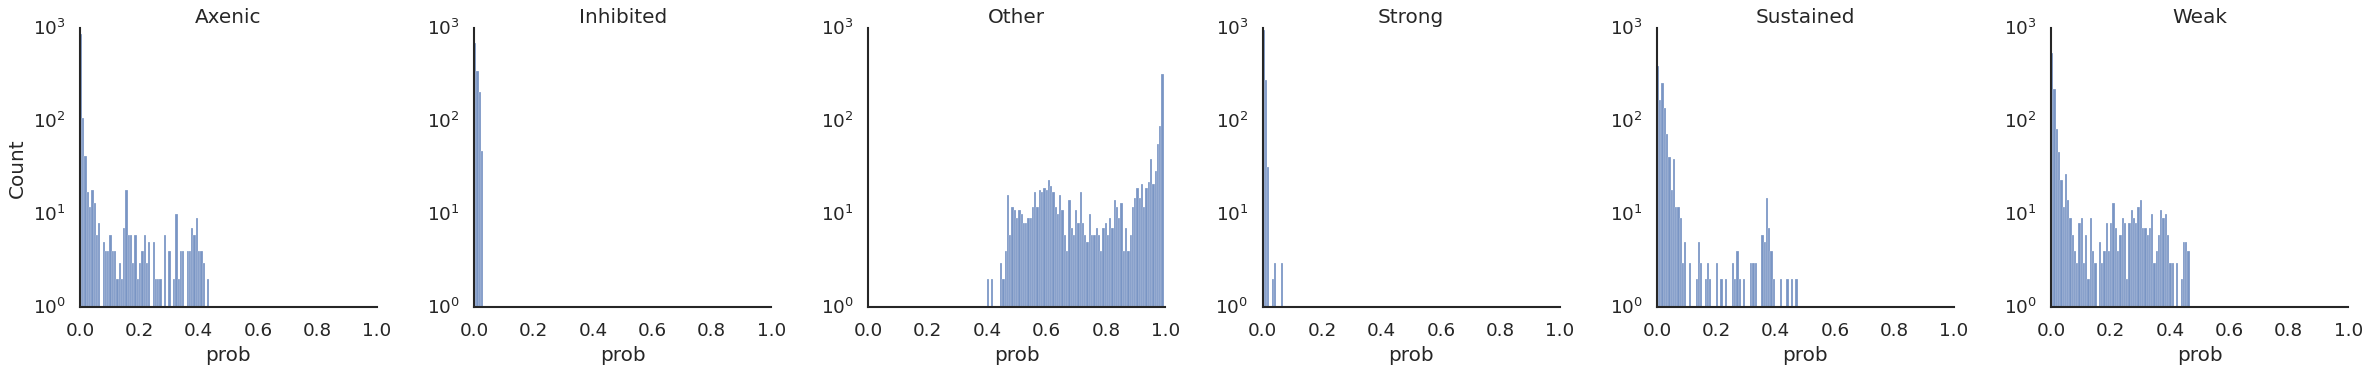

In [249]:
mdf_predicted_prob = df_predicted_prob.melt(
    id_vars=['run_id','y_pred', 'max_prob'], 
    value_vars=stack.classes_, 
    value_name='prob', var_name='Group')
g = sns.displot(
    data=mdf_predicted_prob.loc[mdf_predicted_prob.y_pred.isin(['Other'])], # & mdf_predicted_prob.max_prob.le(0.5)],
    x='prob', 
    col='Group', #col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [250]:
df_predicted_classes = pd.DataFrame({
    'run_id' : X_sim.index,
    'y_pred' : y_sim_pred,
    'max_prob' : max_sim_prob,
})
df_predicted_classes

,run_id,y_pred,max_prob
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.984789
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.933762
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986309
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.988574
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.973069
...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.988767
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990635
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990635
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990635


In [251]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [252]:
class_meta_df  = refdf[['id', 'full name', 'Group']].value_counts().reset_index()

In [253]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.933762,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986309,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.988574,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.973069,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.988767,monte_ROS_9_monte_vpro_93_82_ROS_C1_64,lowN,all,ROS,h-8660846992299669535
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990635,monte_ROS_9_monte_vpro_96_60_ROS_C1_59,lowN,all,ROS,h-8660846992299669535
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990635,monte_ROS_9_monte_vpro_96_60_ROS_C1_66,lowN,all,ROS,h-8660846992299669535
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990635,monte_ROS_9_monte_vpro_97_23_ROS_C1_3,lowN,all,ROS,h-8660846992299669535


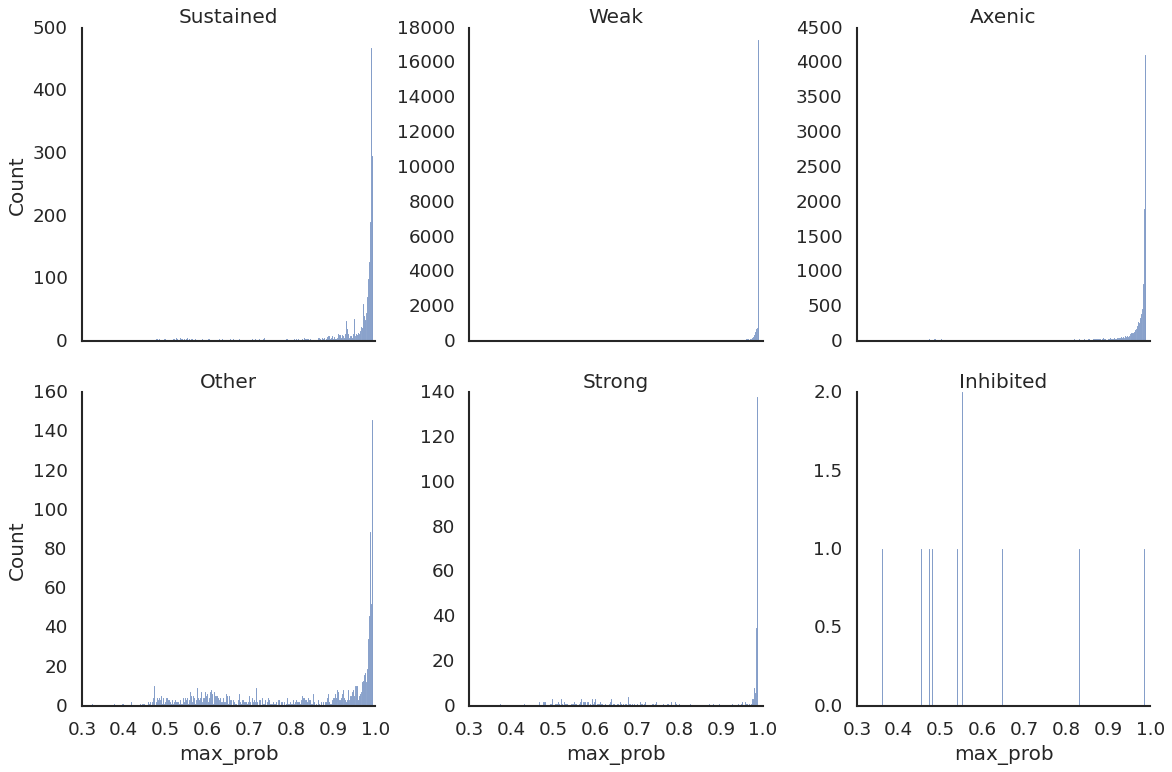

In [254]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

In [255]:
df_predicted_classes.y_pred.value_counts()

Weak         30193
Axenic       15188
Sustained     2333
Other         1275
Strong         349
Inhibited       11
Name: y_pred, dtype: int64

In [256]:
np.unique(y_test, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([ 18,  36, 349,  18,   6,   6]))

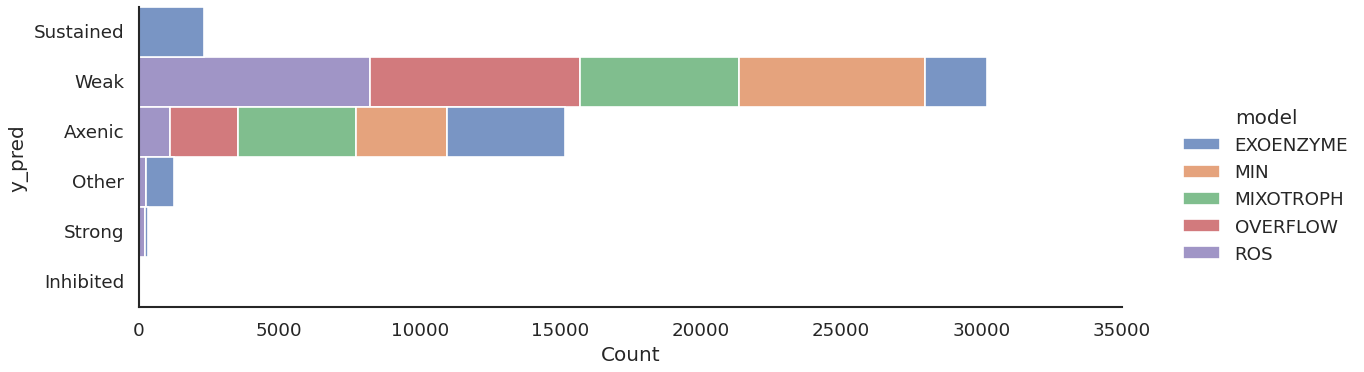

In [257]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
# g.set(xscale='log')

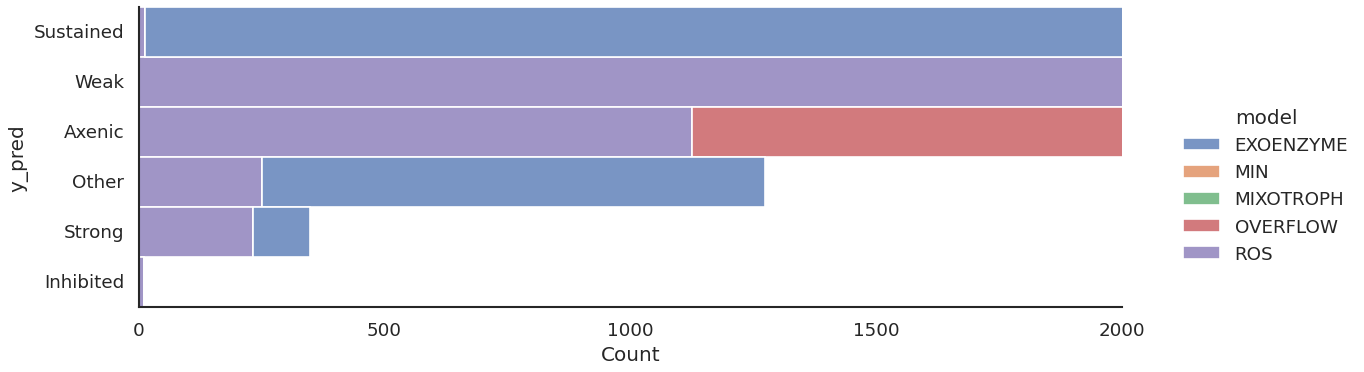

In [258]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
g.set(xlim=(0,2000))

In [259]:
sample_ids = df_predicted_classes.groupby(['model','y_pred']).run_id.sample(50, replace=True)

In [260]:
sample_df = sim_df.loc[sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,run_id,day,ref_Bp[N],ref_Bp[C],y_pred,max_prob,idx,media,which,model,hash
0,monte_ROS_38_monte_vpro_90_89_ROS_C0_57_lowN_a...,0.000000,0.000000,0.771968,Other,0.979096,monte_ROS_38_monte_vpro_90_89_ROS_C0_57,lowN,all,ROS,h-8660846992299669535
1,monte_ROS_38_monte_vpro_90_89_ROS_C0_57_lowN_a...,1.081944,0.650687,1.460917,Other,0.979096,monte_ROS_38_monte_vpro_90_89_ROS_C0_57,lowN,all,ROS,h-8660846992299669535
2,monte_ROS_38_monte_vpro_90_89_ROS_C0_57_lowN_a...,2.164583,1.297377,2.107566,Other,0.979096,monte_ROS_38_monte_vpro_90_89_ROS_C0_57,lowN,all,ROS,h-8660846992299669535
3,monte_ROS_38_monte_vpro_90_89_ROS_C0_57_lowN_a...,2.747222,1.644928,2.455058,Other,0.979096,monte_ROS_38_monte_vpro_90_89_ROS_C0_57,lowN,all,ROS,h-8660846992299669535
4,monte_ROS_38_monte_vpro_90_89_ROS_C0_57_lowN_a...,3.754167,1.912274,2.877949,Other,0.979096,monte_ROS_38_monte_vpro_90_89_ROS_C0_57,lowN,all,ROS,h-8660846992299669535
...,...,...,...,...,...,...,...,...,...,...,...
55421,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,110.943750,0.163206,1.139912,Other,0.954880,monte_ROS_77_monte_vpro_90_89_ROS_C0_29,lowN,all,ROS,h-8660846992299669535
55422,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,115.845833,0.166540,1.143260,Other,0.954880,monte_ROS_77_monte_vpro_90_89_ROS_C0_29,lowN,all,ROS,h-8660846992299669535
55423,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,118.788889,0.168397,1.145125,Other,0.954880,monte_ROS_77_monte_vpro_90_89_ROS_C0_29,lowN,all,ROS,h-8660846992299669535
55424,monte_ROS_77_monte_vpro_90_89_ROS_C0_29_lowN_a...,121.777778,0.170176,1.146913,Other,0.954880,monte_ROS_77_monte_vpro_90_89_ROS_C0_29,lowN,all,ROS,h-8660846992299669535


In [261]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,...,ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group,log_Nbiomass,log_Cbiomass
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,...,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.155478,0.976664
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,...,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.314631,1.135817
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,...,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.452933,1.274119
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,...,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.646610,1.467796
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,...,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak,0.809481,1.630667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,...,0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),131321.579908,Other,0.000000,0.000000
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,...,-0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),-131321.579908,Other,0.000000,0.000000
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,...,1.553581,Axenic_media,NaN,NaN,ctrl,lowP(1:50),262643.159815,Other,0.000000,0.191334
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,...,5.903609,Axenic_media,NaN,NaN,ctrl,lowP(1:50),998044.007298,Other,0.000000,0.771118


In [262]:
refdf = add_log_cols(refdf, 'ref_Bp')

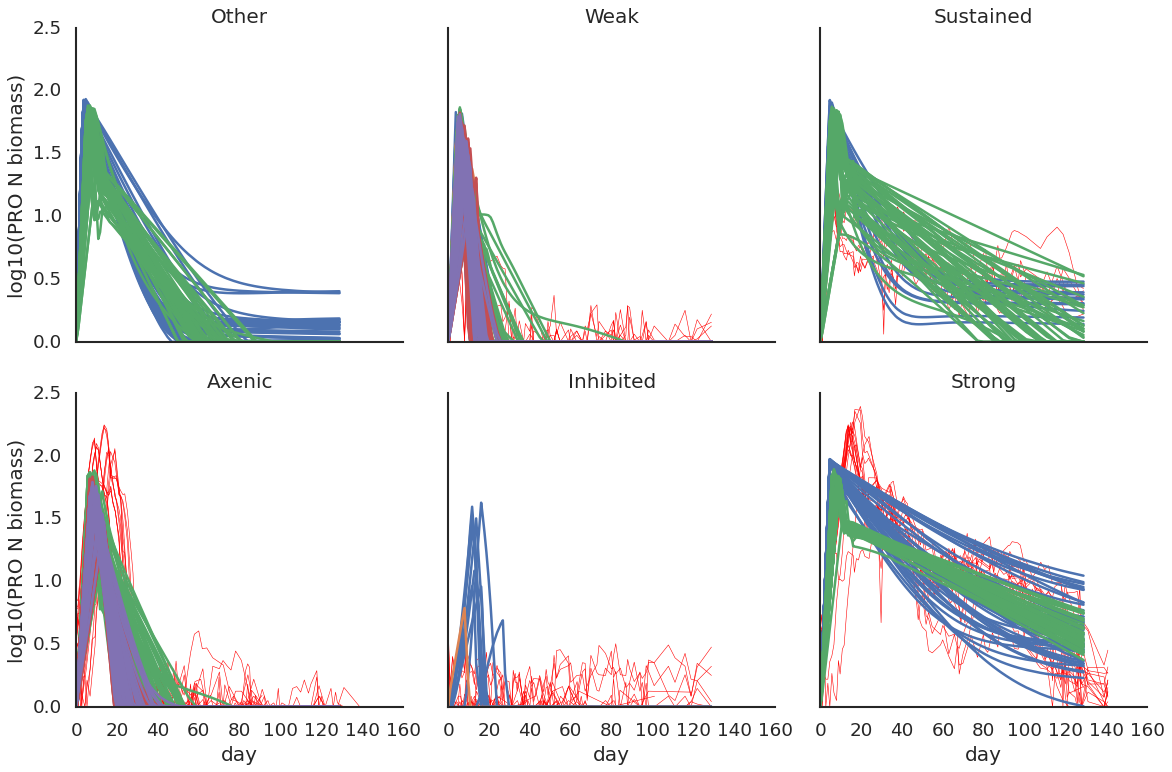

In [263]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (col_val), ax in g.axes_dict.items():
        if col_val != 'Other':
            sns.lineplot(
                data=refdf.loc[refdf['train_Group'].isin([col_val])],
                x='day', y='log_Nbiomass',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
                zorder=-1,

                         legend=False
                        )
    g.set(ylabel='log10(PRO N biomass)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [264]:
class_meta_df

,id,full name,Group,0
0,1,Axenic,Axenic,693
1,4,Phaeobacter gallaeciensis,Inhibited,693
2,5,Pseudoalteromonas haloplanktis,Strong,693
3,6,Ruegeria pomeroyi,Sustained,693
4,3,Marinobacter adhaerens HP15,Inhibited,693
...,...,...,...,...
77,SB_lowP(1:50),Axenic_SB_lowP(1:50),Axenic_Other,156
78,SB_lowP(1:8),Axenic_SB_lowP(1:8),Axenic_Other,156
79,9202_lowP(1:8),Axenic_9202_lowP(1:8),Axenic_Other,156
80,9202_lowP(1:50),Axenic_9202_lowP(1:50),Axenic_Other,156


In [265]:
list(zip(*np.unique(y_sim_pred, return_counts=True)))

[('Axenic', 15188),
 ('Inhibited', 11),
 ('Other', 1275),
 ('Strong', 349),
 ('Sustained', 2333),
 ('Weak', 30193)]

In [266]:
stack.classes_

array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
      dtype=object)

In [267]:
refdf[['id', 'Group']].value_counts()

id               Group       
1                Axenic          693
4                Inhibited       693
5                Strong          693
6                Sustained       693
3                Inhibited       693
                                ... 
SB_lowP(1:50)    Axenic_Other    156
SB_lowP(1:8)     Axenic_Other    156
9202_lowP(1:8)   Axenic_Other    156
9202_lowP(1:50)  Axenic_Other    156
9202_lowN        Axenic_Other    156
Length: 82, dtype: int64

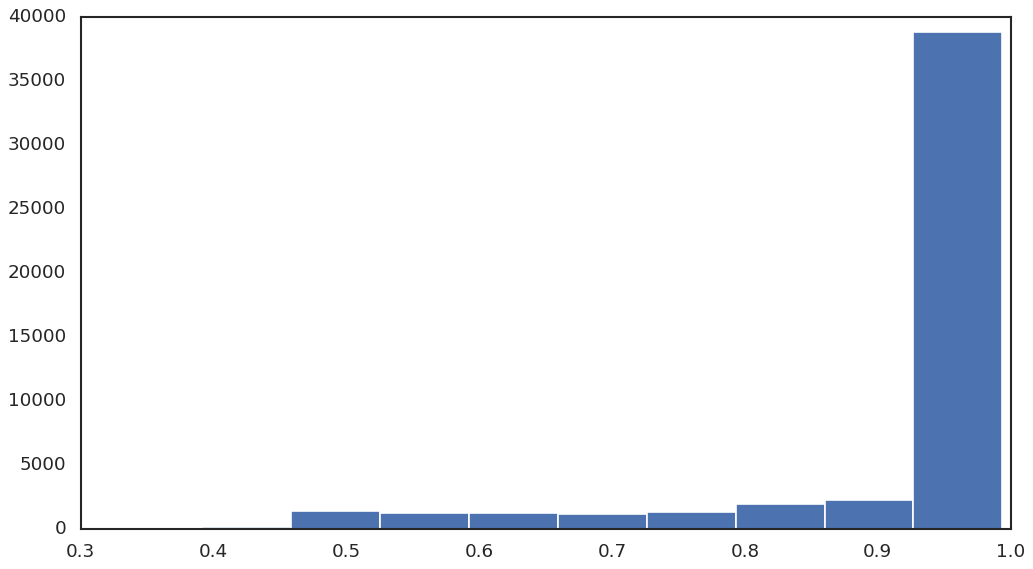

In [268]:
plt.hist(max_sim_prob)  
plt.show()

In [269]:
max_sim_prob.shape

(49349,)

In [270]:
df_predicted_classes.to_csv('monte_predicted_classes.csv.gz', index=False)

In [271]:
X_sim.shape, df_predicted_classes.shape

((49349, 138), (49349, 8))

In [272]:
df_predicted_classes.run_id.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [273]:
X_sim.index.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [274]:
psim_feature_df.index.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [275]:
tmp = sim_df_filtered.pivot_table(index='run_id', values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')
tmp.index.value_counts()

monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373    1
monte_OVERFLOW_40_monte_vpro_32_34_OVERFLOW_C4_37_lowN_all_OVERFLOW_h6878164821315599434        1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_46_lowN_all_OVERFLOW_h6878164821315599434         1
monte_OVERFLOW_3_monte_vpro_54_18_OVERFLOW_C1_9_lowN_all_OVERFLOW_h6878164821315599434          1
monte_OVERFLOW_3_monte_vpro_58_48_OVERFLOW_C2_22_lowN_all_OVERFLOW_h6878164821315599434         1
                                                                                               ..
monte_MIN_6_monte_vpro_90_35_MIN_C2_96_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_26_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_90_91_MIN_C2_90_lowN_all_MIN_h-1541717058758371284                       1
monte_MIN_6_monte_vpro_92_40_MIN_C1_56_lowN_all_MIN_h-1541717058758371284                       1
monte_ROS_9_monte_vp

In [276]:
X_train.index.value_counts()

0       1
1227    1
1225    1
1224    1
1223    1
       ..
605     1
604     1
603     1
602     1
1826    1
Name: smt_id, Length: 1827, dtype: int64

In [277]:
X_train[forest_features]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,last_dayN,last_dayC
smt_id,,,,,,,,,,,,
0,7.984028,63.292311,7.984028,419.311563,1.053290,0.130226,1.000000,4.233329,2.838173,3.806274,27.852778,91.000000
1,7.984028,68.005818,7.984028,450.538545,1.052927,0.175714,1.000000,3.836987,3.031926,3.107162,25.734722,91.000000
2,7.984028,71.453010,7.984028,473.376189,1.000000,0.000000,1.000000,3.107607,1.872630,3.625023,26.747222,88.748611
3,13.695833,176.144498,13.695833,1166.957299,1.074519,0.159291,1.000000,5.062721,2.458807,4.416402,26.747222,91.000000
4,13.695833,165.971655,13.695833,1099.562214,1.131903,0.247444,1.000000,6.065461,3.037455,6.589951,84.218750,91.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,6.731944,9.507471,6.731944,62.986998,1.077356,0.082778,1.067787,5.019446,2.297094,5.760119,19.711111,91.000000
1823,4.701389,6.558427,4.701389,43.449577,1.089833,0.151275,1.004172,4.606480,2.424583,5.180136,16.140972,91.000000
1824,4.701389,7.025671,4.701389,46.545073,1.033474,0.053395,1.000000,3.809365,2.060290,3.403533,19.711111,91.000000


In [278]:
X_sim[forest_features]

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,mean_Nbiomass,std_Nbiomass,median_Nbiomass,mean_Cbiomass,std_Cbiomass,median_Cbiomass,last_dayN,last_dayC
run_id,,,,,,,,,,,,
monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME_C1_29_lowN_all_EXOENZYME_h8519271514136708373,5.720139,48.478110,5.720139,399.217701,4.303229,1.286886,4.206716,36.823801,11.011191,35.998402,62.892361,91.000000
monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME_C2_50_lowN_all_EXOENZYME_h8519271514136708373,9.745833,33.791800,10.834722,181.835638,1.000000,0.000000,1.000000,1.094026,0.165308,1.000000,13.695833,25.734722
monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_C3_68_lowN_all_EXOENZYME_h8519271514136708373,7.984028,70.735295,7.984028,648.347484,1.357662,0.578080,1.000000,9.582779,7.940775,6.922995,33.736111,54.793750
monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_C3_73_lowN_all_EXOENZYME_h8519271514136708373,7.984028,68.387680,7.984028,631.649964,1.200846,0.374667,1.000000,7.297622,6.371312,5.001925,31.076389,49.907639
monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME_C1_74_lowN_all_EXOENZYME_h8519271514136708373,13.695833,18.830866,13.695833,134.907224,1.801020,0.878383,1.515539,13.440149,7.613322,11.877188,37.788889,67.984028
...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_all_ROS_h-8660846992299669535,9.745833,33.550012,9.745833,270.944752,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,13.695833,18.711806
monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_all_ROS_h-8660846992299669535,5.720139,37.039607,6.731944,289.969113,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,10.834722,13.695833
monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_all_ROS_h-8660846992299669535,5.720139,37.586272,6.731944,282.631226,1.000000,0.000000,1.000000,1.101954,0.007327,1.104559,10.834722,13.695833


In [279]:
df_sim_maxday  = X_sim[forest_features].reset_index()

In [280]:
df_train_maxday  = X_train[forest_features].reset_index()
df_train_maxday['y_pred'] = y_train
df_train_maxday = df_train_maxday.melt(id_vars=['smt_id', 'y_pred'])


In [281]:
df_train_maxday

,smt_id,y_pred,variable,value
0,0,Axenic,max_Nday,7.984028
1,1,Axenic,max_Nday,7.984028
2,2,Axenic,max_Nday,7.984028
3,3,Axenic,max_Nday,13.695833
4,4,Axenic,max_Nday,13.695833
...,...,...,...,...
21919,1822,Weak,last_dayC,91.000000
21920,1823,Weak,last_dayC,91.000000
21921,1824,Weak,last_dayC,91.000000
21922,1825,Weak,last_dayC,91.000000


In [282]:
df_sim_maxday = df_sim_maxday.melt(id_vars='run_id')
df_sim_maxday = pd.merge(df_sim_maxday, df_predicted_classes, on='run_id')
df_sim_maxday

,run_id,variable,value,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nday,5.720139,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Nbiomass,48.478110,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cday,5.720139,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,max_Cbiomass,399.217701,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,mean_Nbiomass,4.303229,Sustained,0.984789,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...,...,...
592183,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,mean_Cbiomass,1.000000,Weak,0.991024,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
592184,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,std_Cbiomass,0.000000,Weak,0.991024,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
592185,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,median_Cbiomass,1.000000,Weak,0.991024,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535
592186,monte_ROS_9_monte_vpro_97_23_ROS_C1_5_lowN_all...,last_dayN,7.984028,Weak,0.991024,monte_ROS_9_monte_vpro_97_23_ROS_C1_5,lowN,all,ROS,h-8660846992299669535


In [283]:
df_sim_maxday.columns

Index(['run_id', 'variable', 'value', 'y_pred', 'max_prob', 'idx', 'media',
       'which', 'model', 'hash'],
      dtype='object')

In [284]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

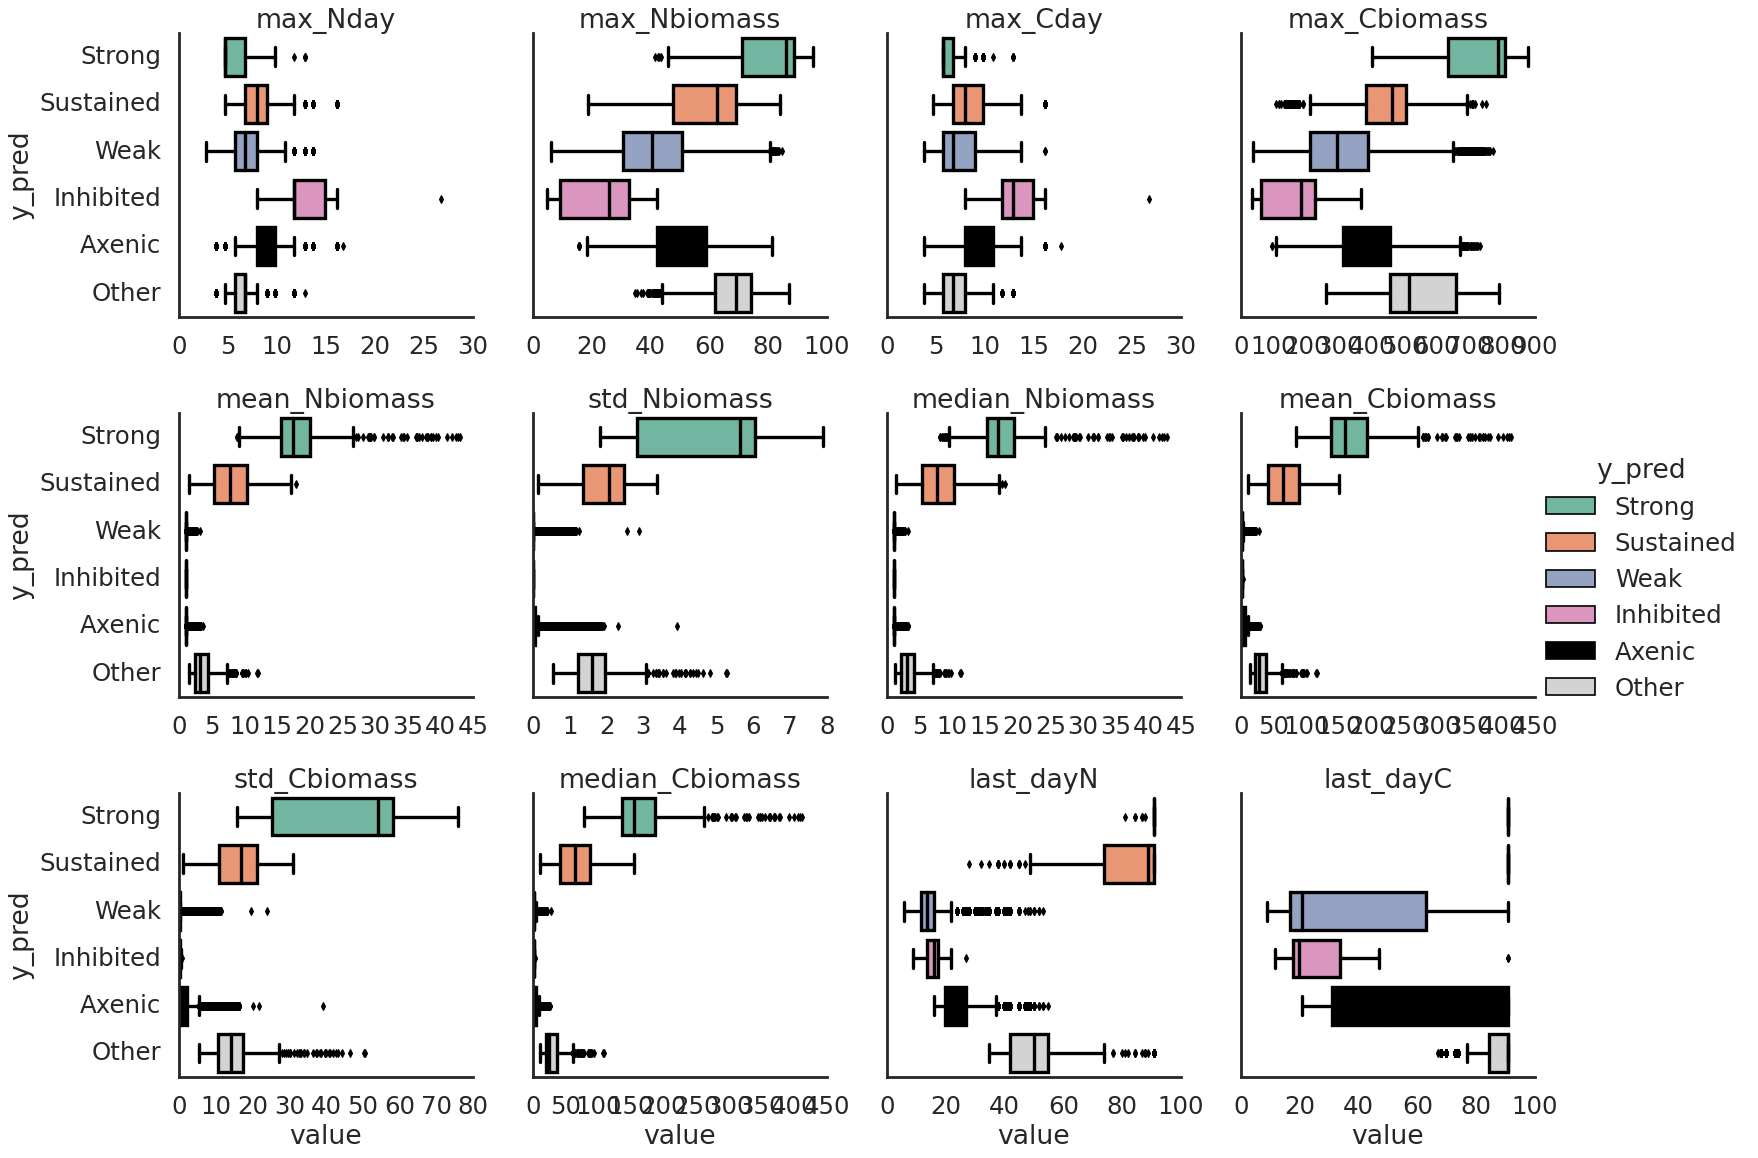

In [285]:
sns.set_context('poster')
sns.catplot(
    data=df_sim_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


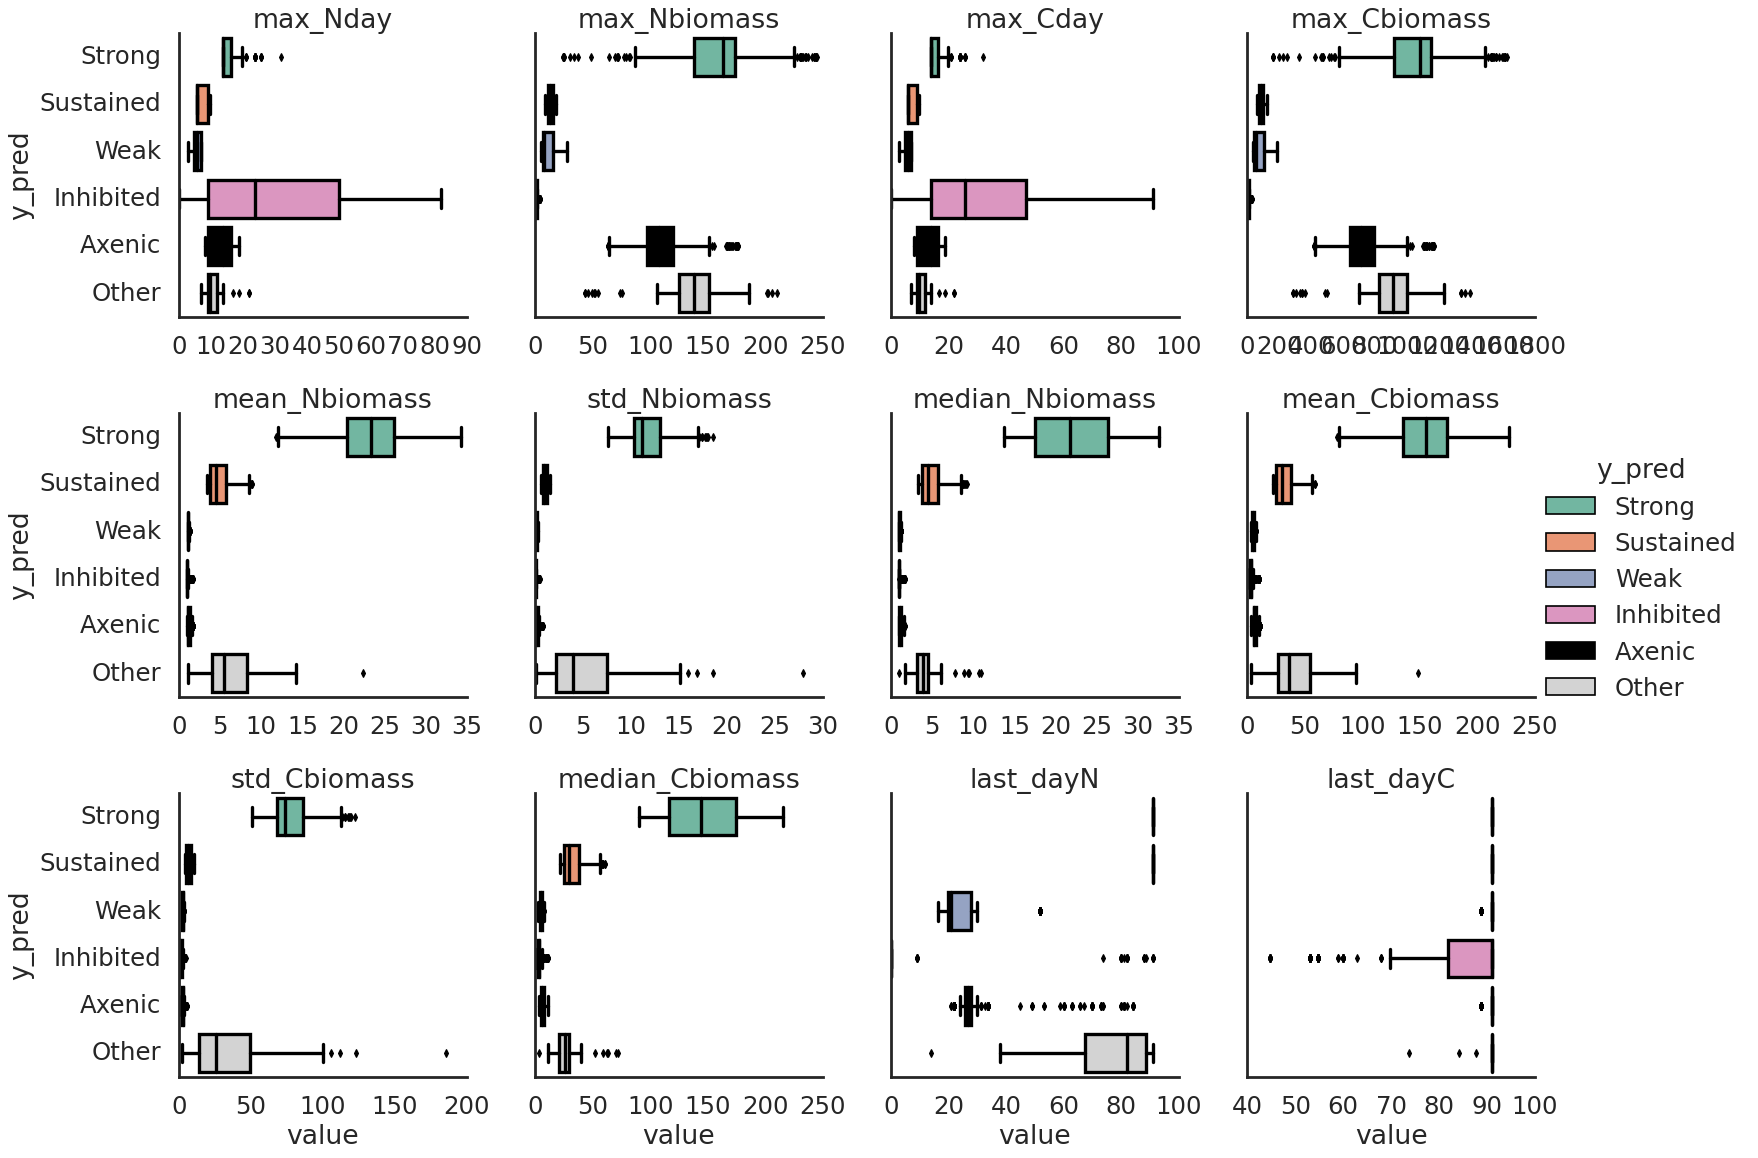

In [286]:
sns.set_context('poster')
sns.catplot(
    data=df_train_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


# Compute features for ref samples

In [287]:
refdf_final_df_log = refdf_final_df.copy()
for c in ['ref_Bp[N]', 'ref_Bp[C]']:
    refdf_final_df_log[c] = np.log10(refdf_final_df_log[c].clip(lower=1))

In [288]:
refdf_final_df_log = refdf_final_df_log.loc[refdf_final_df_log.day.le(91)]

In [289]:
# meed to do that so idxmax will give the correct results
refdf_final_df_log = refdf_final_df_log.reset_index(drop=True)

In [290]:
refdf_final_df_log.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'day', 'ref_Bp[N]', 'ref_Bp[C]', 't'],
      dtype='object')

In [291]:
ref_groupby_col = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',]
# 'Group']
#sim_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

fref_feature_df = _compute_features(refdf_final_df_log, ref_groupby_col, 'ref_Bp')
#psim_df = sim_df.pivot(index=sim_groupby_col, values=sim_log_col, columns='day')

fref_feature_df = fref_feature_df.reset_index()

In [292]:
df_ref_maxday = fref_feature_df.melt(id_vars=ref_groupby_col)


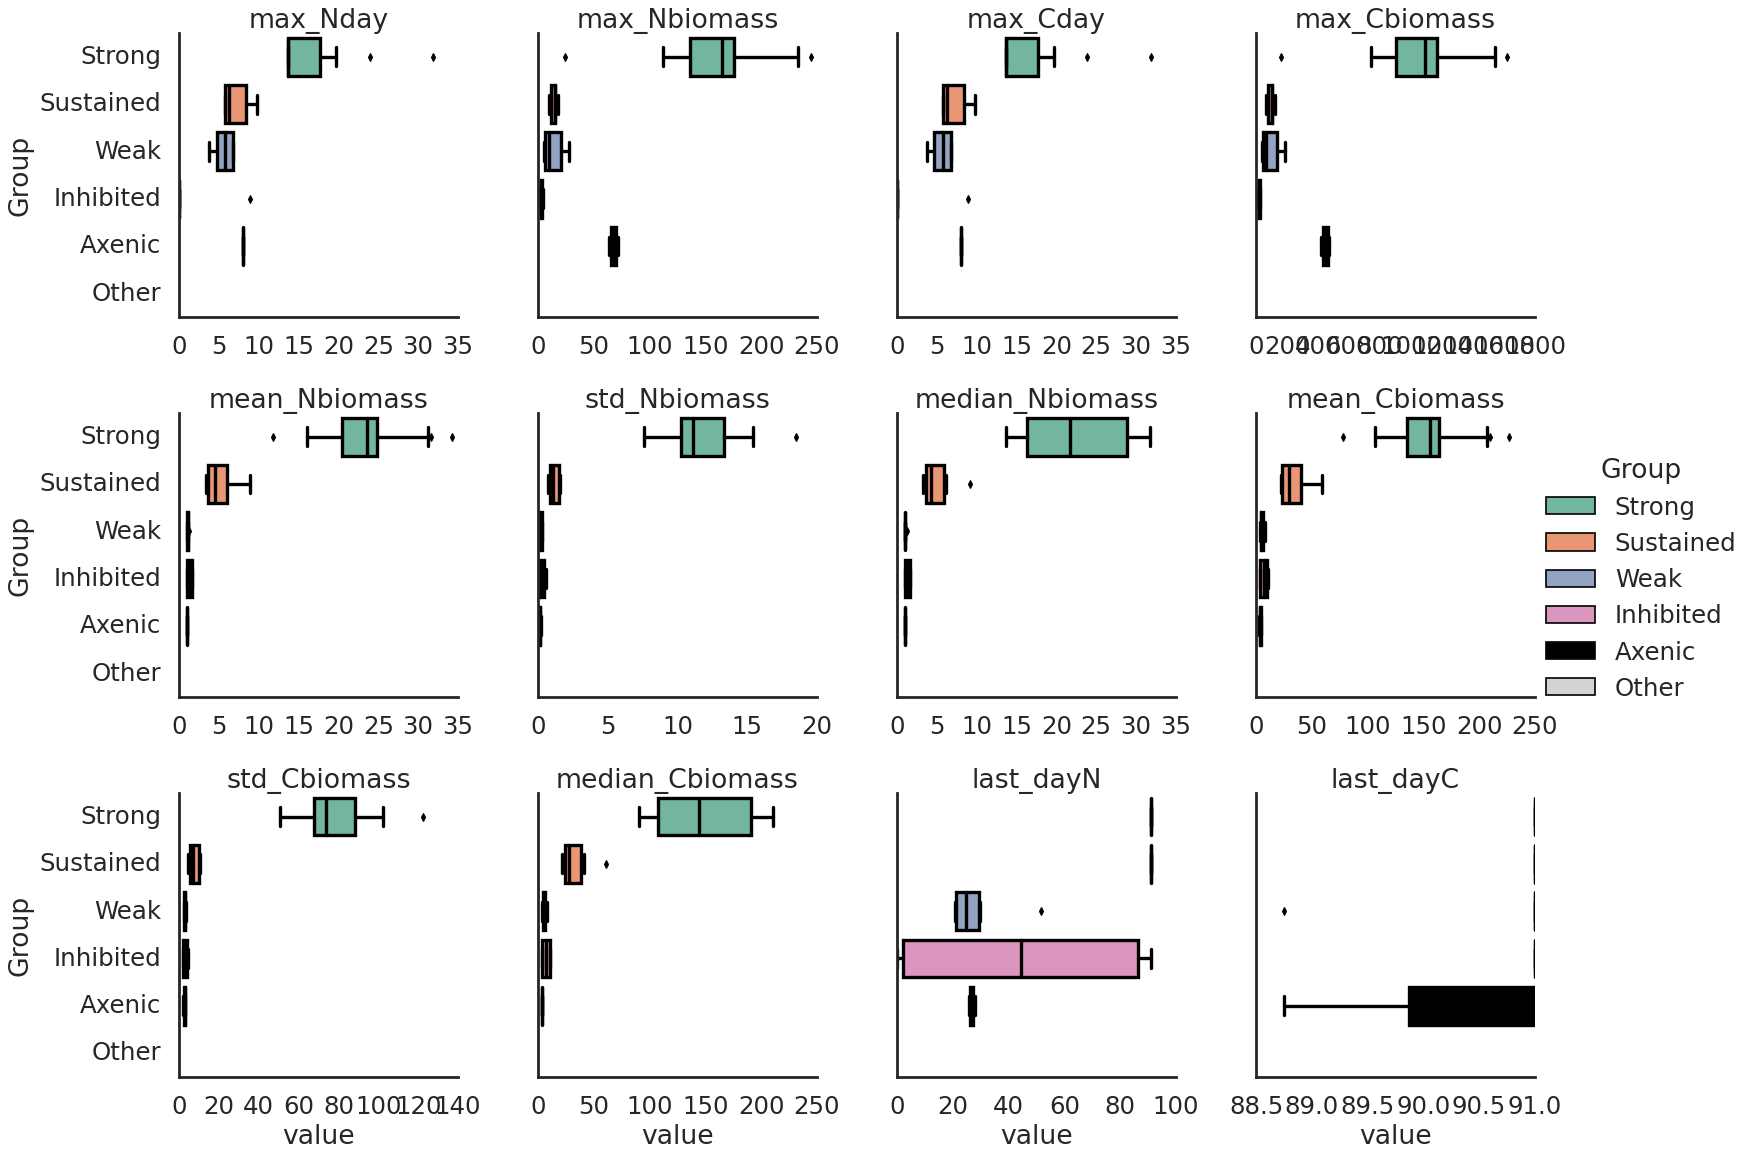

In [293]:
sns.set_context('poster')
sns.catplot(
    data=df_ref_maxday,
    y='Group', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='Group', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


In [294]:
df_ref_maxday['type'] = 'ref' 
df_sim_maxday['type'] = 'simulation' 
df_ref_maxday['y_pred'] = df_ref_maxday['Group']
df_train_maxday['type'] = 'train' 
df_maxday = pd.concat([df_ref_maxday, df_sim_maxday, df_train_maxday], ignore_index=True)

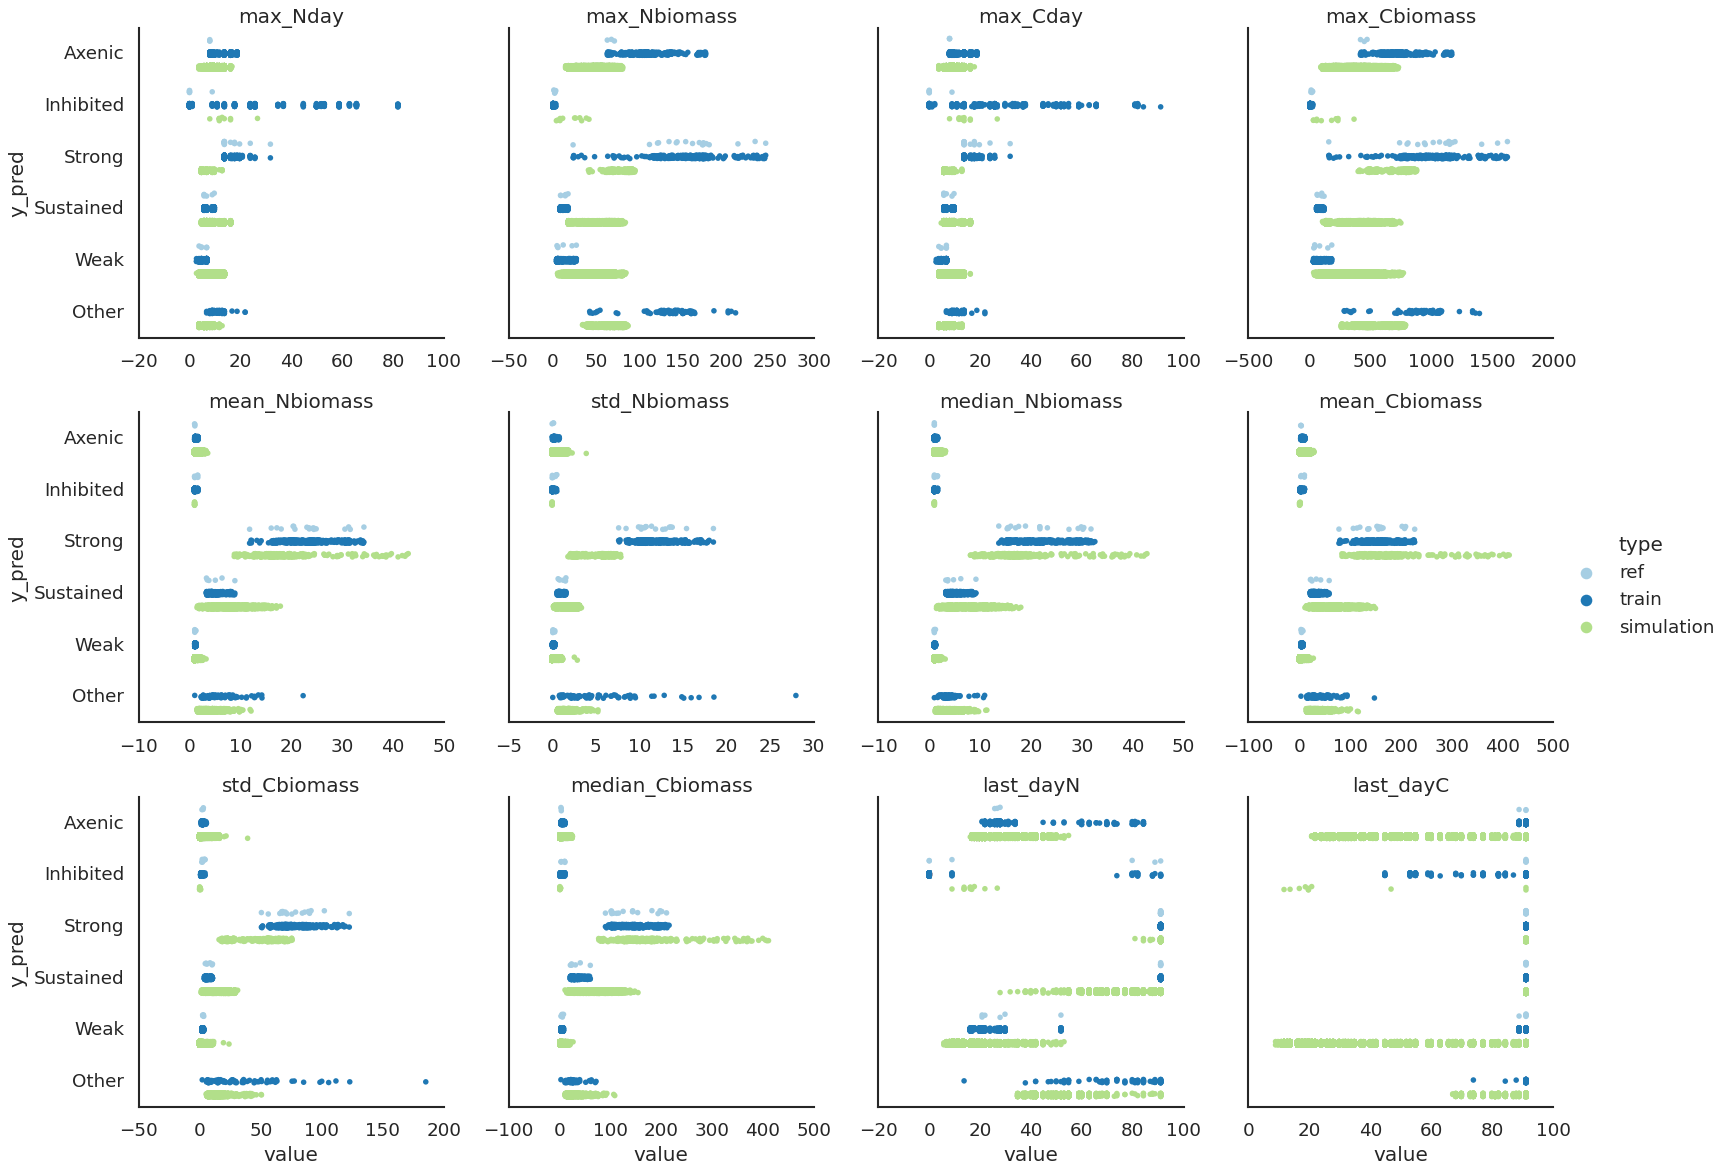

In [295]:
sns.set_context('talk')
sns.catplot(
    data=df_maxday,
    y='y_pred', x='value', #order=gorder,
    col='variable', col_wrap=4, #aspect=2,
    
    #kind='box',
    hue='type', hue_order=['ref', 'train', 'simulation'], palette='Paired',
    sharex=False, dodge=True,
).set_titles(col_template='{col_name}')


In [297]:
from joblib import dump, load
dump(stack, '10CC_ML_classifier.joblib') 

['10CC_ML_classifier.joblib']

In [298]:
stack1 = load('10CC_ML_classifier.joblib') 

In [300]:
stack1.predict(X_test)

array(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Sustained',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited', 'Inhibited',
       